## Цель
### С помощью метода логистической регрессии построить модель прогнозирования отклика на данных ГЛТ Банка.
## Ход действий
Построение модели будет состоять из двух этапов.<br>                                           

На **первом этапе** я разобью историческую выборку на обучающую и контрольную. Контрольную выборку использую для подбора наилучших преобразований, конструирования наиболее полезных признаков. Затеи для подбора оптимальных значений параметров воспользуюсь комбинированной проверкой: на обучающих блоках перекресной проверки буду строить модели с разными значениями параметров, на контрольных блоках перекрестной проверки - настраивать параметры, в результате выберу модель с комбинацией оптимальных значений параметров, обучу на всей обучающей выборке и проверю на контрольной.<br>

В рамках **второго этапа** обучу модель с наилучшими преобразованиями, наиболее полезными признаками и оптимальными значениями параметров на всей исторической выборке и применю модель к выборке новых данных.

**Третий этап** будет включать выводы о проделанной работе.

Исходая выборка содержит записи о 15223 клиентах, классифицированных на два класса:<br>
    0 - отклика не было (13 411 клиентов) <br>
    1 -  отклик был (1812 клиентов).<br>
    
По каждому наблюдению (клиенту) фиксируются 52 исходные переменные.<br>
Список исходных переменных включает:

+ AGREEMENT_RK - катигориальный предиктор (Уникальный идентификатор объекта в выборке)
+ <span style="color:blue">TARGET - категориальная зависимая переменная</span> (Отклик на маркетинговую компанию)
+ AGE - количественный предиктор (Возвраст клиента)
+ SOCSTATUS_WORK_FL - категориальный предиктор (Социальный статус клиента относительно работы)
+ SOCSTATUS_PENS_FL - категориальный предиктор (Социальный статус клиента относительно пенсии)
+ GENDER - категориальный предиктор (Пол клиента)
+ CHILD_TOTAL - категориальный предиктор (Количество детей клиента)
+ DEPENDANTS - категориальный предиктор (Количество иждевенцев клиента)
+ EDUCATION - категориальный предиктор (Образование)
+ MARITAL_STATUS  - категориальный предиктор (Семейное положение)
+ GEN_INDUSTRY - категориальный предиктор (Отрасль работы клиента)
+ GEN_TITLE - категориальный предиктор (Должность)
+ ORG_TP_STATE  - категориальный предиктор (Форма собсвтености компании)
+ ORG_TP_FCAPITAL - категориальный предиктор (Отношение к иностранному капиталу)
+ JOB_DIR - категориальный предиктор (Направление дейятельности внутри компании)
+ FAMILY_INCOME - категориальный предиктор (Семейный доход)
+ PERSONAL_INCOME - категориальный предиктор (Личный доход клиента в рублях)
+ REG_ADDRESS_PROVINCE - категориальный предиктор (Область регистрации)
+ FACT_ADDRESS_PROVINCE - категориальный предиктор (Область фактического местонахождения)
+ POSTAL_ADDRESS_PROVINCE - категориальный предиктор (Почтовый адрес)
+ TP_PROVINCE - категориальный предиктор (Область торговой точки, где клиент последний раз брал кредит)
+ REGION_NM - категориальный предиктор (Регион РФ)
+ REG_FACT_FL - категориальный предиктор (Адрес регистрации и адрес фактического проживания клиента совпадают)
+ FACT_POST_FL - категориальный предиктор (адрес фактического пробывания клиента и почтовый адрес совпадают)
+ REG_POST_FL - категориальный предиктор (Адрес регистрации клиента и его почтовый адрес)
+ REG_FACT_POST_FL - категориальный предиктор (Почтовый, фактический и адрес регистрации совпадают)
+ REG_FACT_POST_TP_FL - категориальный предиктор (область регистрации, фактического пребывания, почтового адреса и область расположения торговой точки, где клиент брал кредит совпадают)
+ FL_PRESENCE_FL - категориальный предиктор (Наличие в собственности квартиры)
+ OWN_AUTO - категориальный предиктор (Количество автомобилей в собственности)
+ AUTO_RUS_FL - категориальный предиктор (Наличие в собственности автомобиля российского производства)
+ HS_PRESENCE_FL - категориальный предиктор (Наличие в собственности загородного дома)
+ COT_PRESENCE_FL - категориальный предиктор (Наличие в собственности коттеджа)
+ GAR_PRESENCE_FL - категориальный предиктор (Наличие в собственности гаража)
+ LAND_PRESENCE_FL - категориальный предиктор (Наличие в собственности земельного участка)
+ CREDIT - количественный предиктор (Сумма последнего кредита в рублях)
+ TERM - количественный предиктор (Срок кредита)
+ FST_PAYMENT - количественный предиктор (Первоначальный взнос)
+ DL_DOCUMENT_FL - категориальный предиктор (В анкете клиент указал водительское удостоверение)
+ GPF_DOCUMENT_FL - категориальный предиктор (В анкете клиент указал ГПФ)
+ FACT_LIVING_TERM  - категориальный предиктор (Количество месяцев проживания по месту фактического пробывания)
+ WORK_TIME - количественный предиктор (Время работы на текущем месте в месяцах)
+ FACT_PHONE_FL - категориальный предиктор (Наличие в заявке телефона по фактическому месту пробывания)
+ REG_PHONE_FL - категориальный предиктор (Наличие в заявке телефона по месту регистрации)
+ GEN_PHONE_FL - категориальный предиктор (Наличие в заявке рабочего телефона)
+ LOAN_NUM_TOTAL - количественный предиктор (Количество ссуд клиента)
+ LOAN_NUM_CLOSED - количественный предиктор (Количество закрытых ссуд клиента)
+ LOAN_NUM_PAYM - количественный предиктор (Количество платежей, которые сделал клиент)
+ LOAN_DLQ_NUM - количественный предиктор (Количество просрочек, допущенных клиентом)
+ LOAN_MAX_DLQ - количественный предиктор (Номер максимальной просрочки клиентом)
+ LOAN_AVG_DLQ_AMT - количественный предиктор (Средняя сумма просрочки в рублях)
+ LOAN_MAX_DLQ_AMT - количественный предиктор (Максимальная сумма просрочки в рублях)
+ PREVIOUS_CARD_NUM_UTILIZED - количественный предиктор (Количество уже утилизированных карт)<br>

Также имеется файл новых данных Credit_GLT_new.csv с известными значениями зависимой переменной.

In [654]:
# импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='')

#### I.1. Считывание CSV-файла, содержащего исторические данные, в объект DataFrame

In [655]:
# загружаю набор данных
data = pd.read_csv('Credit_GLT.csv', encoding='cp1251', sep=';')
#Выбранный тип кодировки необходим для чтения кириллицы
# вывожу первые 5 строчек для оценки данных
data.head()
# Столбцов много - увеличу количество отображаемых
pd.set_option('display.max_columns', 60)

#### I.2. Преобразование типов переменных

In [656]:
# выведу информацию о количестве непропущенных 
# наблюдений в переменных и типах переменных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AGREEMENT_RK                15223 non-null  int64  
 1   TARGET                      15223 non-null  int64  
 2   AGE                         15223 non-null  int64  
 3   SOCSTATUS_WORK_FL           15223 non-null  int64  
 4   SOCSTATUS_PENS_FL           15223 non-null  int64  
 5   GENDER                      15223 non-null  int64  
 6   CHILD_TOTAL                 15223 non-null  int64  
 7   DEPENDANTS                  15223 non-null  int64  
 8   EDUCATION                   15223 non-null  object 
 9   MARITAL_STATUS              15223 non-null  object 
 10  GEN_INDUSTRY                13856 non-null  object 
 11  GEN_TITLE                   13856 non-null  object 
 12  ORG_TP_STATE                13856 non-null  object 
 13  ORG_TP_FCAPITAL             138

Переменные WORK_TIME, GEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE, ORG_TP_FCAPITAL, JOB_DIR имеют одинаковое количество пропусков. Когда у наблюдений имеются пропуски сразу по нескольким переменным, это может говорить о наличии определенного паттерна в данных.<br>
Вижу, что у многих переменных неправильно определен тип.

In [657]:
# переменные, неверно записанные как количественные, преобразую в тип object
for i in ['AGREEMENT_RK', 'TARGET', 'SOCSTATUS_WORK_FL', 
          'SOCSTATUS_PENS_FL', 'GENDER',
          'REG_FACT_FL', 'FACT_POST_FL', 'REG_POST_FL', 
          'REG_FACT_POST_FL', 'REG_FACT_POST_TP_FL', 'FL_PRESENCE_FL', 
          'AUTO_RUS_FL', 'HS_PRESENCE_FL', 'COT_PRESENCE_FL', 
          'GAR_PRESENCE_FL', 'LAND_PRESENCE_FL', 'DL_DOCUMENT_FL', 
          'GPF_DOCUMENT_FL', 'FACT_PHONE_FL', 'REG_PHONE_FL', 'GEN_PHONE_FL']:
    data[i] = data[i].astype('object')

# в указанных переменных заменяю запятую на точку в качестве десятичного разделителя
# и преобразую в тип float
for i in ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 
          'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']:
    data[i] = data[i].str.replace(',', '.').astype('float')
    
# еще раз проверю типы переменных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AGREEMENT_RK                15223 non-null  object 
 1   TARGET                      15223 non-null  object 
 2   AGE                         15223 non-null  int64  
 3   SOCSTATUS_WORK_FL           15223 non-null  object 
 4   SOCSTATUS_PENS_FL           15223 non-null  object 
 5   GENDER                      15223 non-null  object 
 6   CHILD_TOTAL                 15223 non-null  int64  
 7   DEPENDANTS                  15223 non-null  int64  
 8   EDUCATION                   15223 non-null  object 
 9   MARITAL_STATUS              15223 non-null  object 
 10  GEN_INDUSTRY                13856 non-null  object 
 11  GEN_TITLE                   13856 non-null  object 
 12  ORG_TP_STATE                13856 non-null  object 
 13  ORG_TP_FCAPITAL             138

#### I.3. Импутация пропусков

In [658]:
# если в интересующей переменной есть пропуск или при этом переменная SOCSTATUS_PENS_FL
# имеет значение 1,заменяем такие пропуски меткой "Не указано"
data['GEN_INDUSTRY'] = np.where(data['GEN_INDUSTRY'].isnull() \
                                | (data['SOCSTATUS_PENS_FL'] == 1), 
                                'Не указано', data['GEN_INDUSTRY'])
data['GEN_TITLE'] = np.where(data['GEN_TITLE'].isnull()  \
                             | (data['SOCSTATUS_PENS_FL'] == 1), 
                             'Не указано', data['GEN_TITLE'])
data['ORG_TP_STATE'] = np.where(data['ORG_TP_STATE'].isnull() \
                                | (data['SOCSTATUS_PENS_FL'] == 1),
                                'Не указано', data['ORG_TP_STATE'])
data['ORG_TP_FCAPITAL'] = np.where(data['ORG_TP_FCAPITAL'].isnull() \
                                   | (data['SOCSTATUS_PENS_FL'] == 1), 
                                   'Не указано', data['ORG_TP_FCAPITAL'])

# заменяю пропуски в указанных переменных меткой "Не указано"
data['JOB_DIR'] = np.where(data['JOB_DIR'].isnull(), 'Не указано', data['JOB_DIR'])
data['REGION_NM'] = np.where(data['REGION_NM'].isnull(), 'Не указано', data['REGION_NM'])

# пропуски в переменной TP_PROVINCE заменю значением переменной FACT_ADDRESS_PROVINCE
data['TP_PROVINCE'] = np.where(data['TP_PROVINCE'].isnull(), 
                               data['FACT_ADDRESS_PROVINCE'], data['TP_PROVINCE'])
    
# заменяю пропуски в переменной PREVIOUS_CARD_NUM_UTILIZED нулями
data['PREVIOUS_CARD_NUM_UTILIZED'] = np.where(data['PREVIOUS_CARD_NUM_UTILIZED'].isnull(), 0, 
                                              data['PREVIOUS_CARD_NUM_UTILIZED'])
# проверяю, что получилось
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AGREEMENT_RK                15223 non-null  object 
 1   TARGET                      15223 non-null  object 
 2   AGE                         15223 non-null  int64  
 3   SOCSTATUS_WORK_FL           15223 non-null  object 
 4   SOCSTATUS_PENS_FL           15223 non-null  object 
 5   GENDER                      15223 non-null  object 
 6   CHILD_TOTAL                 15223 non-null  int64  
 7   DEPENDANTS                  15223 non-null  int64  
 8   EDUCATION                   15223 non-null  object 
 9   MARITAL_STATUS              15223 non-null  object 
 10  GEN_INDUSTRY                15223 non-null  object 
 11  GEN_TITLE                   15223 non-null  object 
 12  ORG_TP_STATE                15223 non-null  object 
 13  ORG_TP_FCAPITAL             152

#### I.4. Обработка редких категорий

In [659]:
# выделяю категориальные переменные в группу
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']

# выводим статистики по категориальным переменным,
# смотрим unique - количество уникальных значений,
# выявляем бесполезные переменные - переменные, у
# которых уникальных значений столько, сколько
# наблюдений (AGREEMENT_RK), и переменные с одним
# уникальным значением (DL_DOCUMENT_FL)
data[categorical_columns].describe()

,AGREEMENT_RK,TARGET,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,FAMILY_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM,REG_FACT_FL,FACT_POST_FL,REG_POST_FL,REG_FACT_POST_FL,REG_FACT_POST_TP_FL,FL_PRESENCE_FL,AUTO_RUS_FL,HS_PRESENCE_FL,COT_PRESENCE_FL,GAR_PRESENCE_FL,LAND_PRESENCE_FL,DL_DOCUMENT_FL,GPF_DOCUMENT_FL,FACT_PHONE_FL,REG_PHONE_FL,GEN_PHONE_FL
count,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223
unique,15223,2,2,2,2,7,5,32,13,6,3,11,5,81,81,80,72,12,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2
top,59910150,0,1,0,1,Среднее специальное,Состою в браке,Торговля,Специалист,Частная компания,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,Краснодарский край,Краснодарский край,Краснодарский край,Краснодарский край,ЮЖНЫЙ,1,1,1,1,1,0,0,0,0,0,0,0,1,1,0,1
freq,1,13411,13847,13176,9964,6518,9416,2303,6680,6267,13009,11452,7077,674,674,674,790,2179,12765,14480,13493,12758,13782,10507,14097,11940,15074,14930,14558,15223,8961,9311,14389,13855


В этой сводке интересует строка unique - количество уникальных значений. С помощью нее выявлю бесполезные переменные, то есть такие, где уникальных значений столько, сколько наблюдений (в сводке это AGREEMENT_RK и переменная с одним уникальным значением DL_DOCUMENT_FL.
Теперь их можно удалить.

In [660]:
# удаляю идентификационную переменную AGREEMENT_RK,
# потому что у нее количество уникальных значений
# равно количеству наблюдений
data.drop('AGREEMENT_RK', axis=1, inplace=True)

# удаляю переменную DL_DOCUMENT_FL, потому что 
# у нее одно уникальное значение
data.drop('DL_DOCUMENT_FL', axis=1, inplace=True)

Заново выделю категориальные переменные в группу и с помощью цикла for выведу частоты по каждой переменной и определю редкие категории.

In [661]:
# заново выделю категориальные переменные в группу
# и пробегу по ней, выводя частоты категорий
# по каждой категориальной переменной, чтобы
# выявить редкие категории
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
for c in categorical_columns:
    print(data[c].value_counts(dropna=False))

0    13411
1     1812
Name: TARGET, dtype: int64
1    13847
0     1376
Name: SOCSTATUS_WORK_FL, dtype: int64
0    13176
1     2047
Name: SOCSTATUS_PENS_FL, dtype: int64
1    9964
0    5259
Name: GENDER, dtype: int64
Среднее специальное               6518
Среднее                           4679
Высшее                            3133
Неоконченное высшее                532
Неполное среднее                   340
Два и более высших образования      20
Ученая степень                       1
Name: EDUCATION, dtype: int64
Состою в браке        9416
Не состоял в браке    3622
Разведен(а)           1245
Вдовец/Вдова           588
Гражданский брак       352
Name: MARITAL_STATUS, dtype: int64
Торговля                                     2303
Не указано                                   2048
Другие сферы                                 1639
Металлургия/Промышленность/Машиностроение    1285
Государственная служба                       1223
Здравоохранение                              1087
Образование

В переменной REDION_NM заменю категорию "Не указано" из одного наблюдения на самую часто встречающуюся "ЮЖНЫЙ".<BR> Также после просмотре заметил некорректную категорию "ПОВОЛЖСКИЙ", которую исправлю на "ПРИВОЛЖСКИЙ".<BR> В переменных REG_ADDRESS_PROVINCE, POSTAL_ADDRESS_PROVINCE, FACT_ADDRESS_PROVINCE, TP_PROVINCE редкие категории  запишу в отдельную категорию "ДРУГОЕ" 

In [662]:
# заменяю категорию "Не указано" на категорию "ЮЖНЫЙ"
data['REGION_NM'] = np.where(data['REGION_NM'] == 'Не указано', 'ЮЖНЫЙ', 
                             data['REGION_NM'])
    
# заменяю неверную категорию "ПОВОЛЖСКИЙ" на категорию "ПРИВОЛЖСКИЙ"
data['REGION_NM'] = data['REGION_NM'].replace('ПОВОЛЖСКИЙ', 'ПРИВОЛЖСКИЙ')
    

In [663]:
# записываю редкие категории в одну отдельную категорию
for i in ['REG_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE']:
    data[i] = np.where((data[i] == 'Москва') \
                       | (data[i] == 'Хакасия') \
                       | (data[i] == 'Ямало-Ненецкий АО') \
                       | (data[i] == 'Магаданская область') \
                       | (data[i] == 'Калмыкия') \
                       | (data[i] == 'Дагестан') \
                       | (data[i] == 'Агинский Бурятский АО') \
                       | (data[i] == 'Усть-Ордынский Бурятский АО') \
                       | (data[i] == 'Эвенкийский АО') \
                       | (data[i] == 'Коми-Пермяцкий АО') \
                       | (data[i] == 'Чечня'), 
                       'ДРУГОЕ', data['REG_ADDRESS_PROVINCE'])

data['TP_PROVINCE'] = np.where((data['TP_PROVINCE'] == 'Сахалинская область') \
                               | (data['TP_PROVINCE'] == 'Еврейская АО') \
                               | (data['TP_PROVINCE'] == 'Магаданская область') \
                               | (data['TP_PROVINCE'] == 'Дагестан') \
                               | (data['TP_PROVINCE'] == 'Кабардино-Балкария'), 
                               'ДРУГОЕ', data['TP_PROVINCE'])

Выполню укрупнение категорий для переменных EDUCATION, GEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE, JOB_DIRE


In [664]:
data['EDUCATION'].value_counts(dropna=False)

Среднее специальное               6518
Среднее                           4679
Высшее                            3133
Неоконченное высшее                532
Неполное среднее                   340
Два и более высших образования      20
Ученая степень                       1
Name: EDUCATION, dtype: int64

In [665]:
# укрупняю категории переменной EDUCATION
data['EDUCATION'] = data['EDUCATION'].replace('Ученая степень','Высшее')
data['EDUCATION'] = data['EDUCATION'].replace('Два и более высших образования', 'Высшее') 


In [666]:

# оцениваю частоты категорий переменной EDUCATION
data['EDUCATION'].value_counts(dropna=False)

Среднее специальное    6518
Среднее                4679
Высшее                 3154
Неоконченное высшее     532
Неполное среднее        340
Name: EDUCATION, dtype: int64

In [667]:
data['GEN_INDUSTRY'].value_counts(dropna=False)

Торговля                                     2303
Не указано                                   2048
Другие сферы                                 1639
Металлургия/Промышленность/Машиностроение    1285
Государственная служба                       1223
Здравоохранение                              1087
Образование                                   923
Транспорт                                     763
Сельское хозяйство                            670
Строительство                                 556
Коммунальное хоз-во/Дорожные службы           495
Ресторанный бизнес/Общественное питание       393
Наука                                         361
Нефтегазовая промышленность                   220
Банк/Финансы                                  168
Сборочные производства                        167
Энергетика                                    139
Развлечения/Искусство                         129
ЧОП/Детективная д-ть                          128
Информационные услуги                         102


In [668]:
# записываю некоторые категории переменной GEN_INDUSTRY 
# в отдельную категорию
replacements = {
    'Юридические услуги/нотариальные услуги': 'Другие сферы',
    'Страхование': 'Другие сферы',
    'Туризм': 'Другие сферы',
    'Недвижимость': 'Другие сферы',
    'Управляющая компания': 'Другие сферы',
    'Логистика': 'Другие сферы',
    'Подбор персонала': 'Другие сферы',
    'Маркетинг': 'Другие сферы'
    }

data['GEN_INDUSTRY'] = data['GEN_INDUSTRY'].replace(replacements)


In [669]:
# смотрим частоты категорий переменной GEN_INDUSTRY
data['GEN_INDUSTRY'].value_counts(dropna=False)

Торговля                                     2303
Не указано                                   2048
Другие сферы                                 1776
Металлургия/Промышленность/Машиностроение    1285
Государственная служба                       1223
Здравоохранение                              1087
Образование                                   923
Транспорт                                     763
Сельское хозяйство                            670
Строительство                                 556
Коммунальное хоз-во/Дорожные службы           495
Ресторанный бизнес/Общественное питание       393
Наука                                         361
Нефтегазовая промышленность                   220
Банк/Финансы                                  168
Сборочные производства                        167
Энергетика                                    139
Развлечения/Искусство                         129
ЧОП/Детективная д-ть                          128
Информационные услуги                         102


In [670]:
data['GEN_TITLE'].value_counts(dropna=False)

Специалист                        6680
Рабочий                           2898
Не указано                        2048
Служащий                           858
Руководитель среднего звена        657
Работник сферы услуг               529
Высококвалифиц. специалист         529
Руководитель высшего звена         409
Индивидуальный предприниматель     210
Другое                             171
Руководитель низшего звена         133
Военнослужащий по контракту         88
Партнер                             13
Name: GEN_TITLE, dtype: int64

In [671]:
# укрупняю категории переменной GEN_TITLE
replacements = {'Партнер': 'Другое','Военнослужащий по контракту': 'Другое'}
data['GEN_TITLE']  = data['GEN_TITLE'].replace(replacements)


# оцениваю частоты категорий переменной GEN_TITLE
data['GEN_TITLE'].value_counts(dropna=False)

Специалист                        6680
Рабочий                           2898
Не указано                        2048
Служащий                           858
Руководитель среднего звена        657
Работник сферы услуг               529
Высококвалифиц. специалист         529
Руководитель высшего звена         409
Другое                             272
Индивидуальный предприниматель     210
Руководитель низшего звена         133
Name: GEN_TITLE, dtype: int64

In [672]:
data['ORG_TP_STATE'].value_counts(dropna=False)

Частная компания                  6267
Государственная комп./учреж.      5726
Не указано                        2048
Индивидуальный предприниматель     930
Некоммерческая организация         231
Частная ком. с инос. капиталом      21
Name: ORG_TP_STATE, dtype: int64

In [673]:
# укрупняю категории переменной ORG_TP_STATE
data['ORG_TP_STATE'] =data['ORG_TP_STATE'].replace('Частная ком. с инос. капиталом','Частная компания')

# оцениваю частоты категорий переменной ORG_TP_STATE
data['ORG_TP_STATE'].value_counts(dropna=False)

Частная компания                  6288
Государственная комп./учреж.      5726
Не указано                        2048
Индивидуальный предприниматель     930
Некоммерческая организация         231
Name: ORG_TP_STATE, dtype: int64

In [674]:
data['JOB_DIR'].value_counts(dropna=False)

Участие в основ. деятельности    11452
Не указано                        1367
Вспомогательный техперсонал       1025
Бухгалтерия, финансы, планир.      481
Адм-хоз. и трансп. службы          279
Снабжение и сбыт                   217
Служба безопасности                164
Кадровая служба и секретариат      101
Пр-техн. обесп. и телеком.          75
Юридическая служба                  53
Реклама и маркетинг                  9
Name: JOB_DIR, dtype: int64

In [675]:
# укрупняю категории переменной JOB_DIR
replacemants = {'Реклама и маркетинг':'Другое',
               'Кадровая служба и секретариат': 'Другое',
               'Пр-техн. обесп. и телеком': 'Другое',
               'Юридическая служба': 'Другое'
               }
data['JOB_DIR'] = data['JOB_DIR'].replace(replacemants)
# смотрим частоты категорий переменной JOB_DIR
data['JOB_DIR'].value_counts(dropna=False)

Участие в основ. деятельности    11452
Не указано                        1367
Вспомогательный техперсонал       1025
Бухгалтерия, финансы, планир.      481
Адм-хоз. и трансп. службы          279
Снабжение и сбыт                   217
Служба безопасности                164
Другое                             163
Пр-техн. обесп. и телеком.          75
Name: JOB_DIR, dtype: int64

#### I.5 Конструирование новых признаков

Теперь можно приступить к созданию новых признаков, которые не потребуют дополнительных вычислений, и поэтому их можно создавать до или после разбиения на контрольную и обучающую выборки.<br>
Создам FACT_TP_FL, которая принимает значение 1, если область фактического пребывания клиента и область торговой точки, где клиент брал последний кредит, совпадают, или 0 в противном случае.<br>
Также создам переменную AUTO_FOR_FL,которая принимает значение 1, если у клиента есть автомобиль импортного производства, или 0 в противном случае.<br>
Еще можно создать парное взаимодействие переменных GENDER и GAR_PRESENCE_FL и парное взаимодействие переменных REG_FACT_FL и GAR_PRESENCE_FL.


In [676]:
# создаю переменную FACT_TP_FL, которая принимает значение 1, если 
# область фактического пребывания клиента и область торговой точки, 
# где клиент брал последний кредит, совпадают, или 0 в противном случае
data['FACT_TP_FL'] = np.where(data['FACT_ADDRESS_PROVINCE'] == data['TP_PROVINCE'], 
                              1, 0).astype('object')

# создаю переменную AUTO_FOR_FL, которая принимает значение 1,
# если у клиента – импортный автомобиль, или 0 в противном случае
data['AUTO_FOR_FL'] = np.where((data['AUTO_RUS_FL'] == '0') & (data['OWN_AUTO'] > 0), 
                               1, 0).astype('object')

In [677]:
# напишу функцию, которая создает переменную 
# в результате конъюнкции (логическое И) переменных f1 и f2
def make_conj(df, f1, f2):
    df[f1 + "+" + f2] = df[f1].astype('str') + " + " + df[f2].astype('str')  

In [678]:
# применяем функцию
make_conj(data, 'GENDER', 'GAR_PRESENCE_FL')
make_conj(data, 'REG_FACT_FL', 'GAR_PRESENCE_FL')

In [679]:
# Результат функции
data.iloc[:, -2:]


,GENDER+GAR_PRESENCE_FL,REG_FACT_FL+GAR_PRESENCE_FL
0,1 + 0,1 + 0
1,1 + 0,1 + 0
2,1 + 0,1 + 0
3,1 + 0,0 + 0
4,0 + 0,1 + 0
...,...,...
15218,0 + 0,0 + 0
15219,1 + 0,1 + 0
15220,1 + 0,1 + 0
15221,1 + 0,1 + 0


In [680]:
# выведу статистики по количественным переменным
data.describe()

,AGE,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,OWN_AUTO,CREDIT,TERM,FST_PAYMENT,FACT_LIVING_TERM,WORK_TIME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
count,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,1.522300e+04,1.385500e+04,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000
mean,40.406096,1.099389,0.645208,13853.836323,0.116337,14667.959345,8.101031,3398.562655,3.039340e+03,2.922120e+02,1.387769,0.751889,7.875977,0.195362,0.130198,239.457144,243.021626,0.019050
std,11.601068,0.995411,0.812252,9015.467617,0.320844,12147.873496,4.094090,5158.108934,2.624554e+05,2.436483e+04,0.793566,0.988499,7.955747,0.685022,0.355702,827.700432,836.100116,0.137663
min,21.000000,0.000000,0.000000,24.000000,0.000000,2000.000000,3.000000,0.000000,-2.600000e+01,1.000000e+00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,0.000000,8000.000000,0.000000,6500.000000,6.000000,1000.000000,4.100000e+01,2.400000e+01,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,0.000000,12000.000000,0.000000,11550.000000,6.000000,2000.000000,1.080000e+02,4.800000e+01,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,50.000000,2.000000,1.000000,17000.000000,0.000000,19170.000000,10.000000,4000.000000,2.040000e+02,1.100000e+02,2.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,67.000000,10.000000,7.000000,250000.000000,2.000000,119700.000000,36.000000,140000.000000,2.810200e+07,2.867959e+06,11.000000,11.000000,114.000000,13.000000,8.000000,28012.200000,28012.200000,2.000000


В полученной сводке обращают на себя следующие моменты:

+ отрицательное минимальное значение FACT_LIVING_TERM
+ нулевые минимальные значения переменных CHILD_TOTAL, DEPENDANTS, OWN_AUTO, FST_PAYMENT, LOAN_NUM_CLOSED, LOAN_DLQ_NUM, LOAN_MAX_DLQ, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT, PREVIOUS_CARD_NUM_UTILIZED так как при конструировании новых признаков на базе таких переменных нужно учитывать, что при делении на ноль могут появятся бесконечные значения (infinite values)
+ аномально большие максимальные значения переменных FACT_LIVING_TERM и WORK_TIME, такие значения могут снизить качество регрессионной модели<br>

Значения переменной FACT_LIVING_TERM беру по модулю, чтобы избавиться от отрицательных значений.

In [681]:
# значения переменной FACT_LIVING_TERM беру по модулю, 
# чтобы избавиться от отрицательных значений
data['FACT_LIVING_TERM'] = data['FACT_LIVING_TERM'].abs()

#### I.6. Разбиение на обучающую и контрольную выборки

In [682]:
# разбиваю данные на обучающую и контрольную выборки
train = data.sample(frac=0.7, random_state=12345)
test = data.drop(train.index)

#### I.7. Импутация пропусков (ее нужно выполнять после разбиения на обучение/контроль)

Импутацию пропусков рекомендуется выполнять после разбиения  на обучающий и контрольный наборы по следующим причинам:
+  Избегание утечки информации: Если выполнить импутацию до разбиения данных, то информация из тестового набора может «просочиться» в обучающий набор, что приведет к искажению результатов и завышенной оценке качества модели.
+  Реалистичная оценка модели: При разбиении данных на обучающий и контрольный наборы мы стремимся имитировать ситуацию реального мира, где данные для прогнозирования будут поступать без пропущенных значений. Импутация после разбиения позволяет оценивать модель на реалистичных данных.
+ Предотвращение переобучения: Если выполнить импутацию до разбиения, то модель может случайно использовать информацию из тестового набора данных при заполнении пропущенных значений, что может привести к переобучению.

In [683]:
# наблюдения, в которых количество лет проживания 
# по месту фактического пребывания превышает
# возраст, записываю как пропуски 
train['FACT_LIVING_TERM'] = np.where(train['FACT_LIVING_TERM'] / 12 > train['AGE'],
                                     np.NaN, train['FACT_LIVING_TERM'])
test['FACT_LIVING_TERM'] = np.where(test['FACT_LIVING_TERM'] / 12 > test['AGE'], 
                                    np.NaN, test['FACT_LIVING_TERM'])

# импутирую пропуски медианой, вычисленной на обучающей выборке
train['FACT_LIVING_TERM'].fillna(train['FACT_LIVING_TERM'].median(), 
                                 inplace=True)
test['FACT_LIVING_TERM'].fillna(train['FACT_LIVING_TERM'].median(), 
                                inplace=True)

In [684]:
# наблюдения, в которых время работы в годах превышает 
# возраст (например, человек работает 40 лет, а живет 
# всего 25), записываю как пропуски 
train['WORK_TIME'] = np.where(train['WORK_TIME'] / 12 > train['AGE'], 
                              np.NaN, train['WORK_TIME'])
test['WORK_TIME'] = np.where(test['WORK_TIME'] / 12 > test['AGE'], 
                             np.NaN, test['WORK_TIME'])

# наблюдения, в которых разница между возрастом и временем работы в годах 
# меньше 16 (например, у 30-летнего время работы в годах составляет 20 лет,
# получается, он работает с 10 лет), записываю как пропуски 

train['WORK_TIME'] = np.where((train['AGE'] - train['WORK_TIME'] / 12) < 16, 
                              np.NaN, train['WORK_TIME'])
test['WORK_TIME'] = np.where((test['AGE'] - test['WORK_TIME'] / 12) < 16, 
                             np.NaN, test['WORK_TIME'])

# импутирую пропуски медианой, вычисленной на обучающей выборке
train['WORK_TIME'].fillna(train['WORK_TIME'].median(), inplace=True)
test['WORK_TIME'].fillna(train['WORK_TIME'].median(), inplace=True)

In [685]:
# проверю информацию об общем количестве пропущенных 
# наблюдений в обучающей и контрольной выборках
print(train.isnull().sum().sum())
print(test.isnull().sum().sum())

0
0


#### I.8. Биннинг для конструирования новых признаков


На основе переменной PERSON_INCOME я создам временную переменную PERSONAL_INCOME_CAT, укоторой метки будут повторять метки категорий FANILY_INCOME.

In [686]:
# на основе переменной PERSONAL_INCOME создам временную переменную 
# PERSONAL_INCOME_CAT, у которой метки категорий будут 
# повторять метки категорий FAMILY_INCOME
bins = [-np.inf, 5000, 10000, 20000, 50000, np.inf]
lab = ['до 5000 руб.', 'от 5000 до 10000 руб.', 'от 10000 до 20000 руб.', 
       'от 20000 до 50000 руб.', 'свыше 50000 руб.']
train['PERSONAL_INCOME_CAT'] = pd.cut(train['PERSONAL_INCOME'], bins, labels=lab)
test['PERSONAL_INCOME_CAT'] = pd.cut(test['PERSONAL_INCOME'], bins, labels=lab)

In [687]:
# ввожу метки переменной PERSONAL_INCOME_CAT
train['PERSONAL_INCOME_CAT'].unique()

['до 5000 руб.', 'от 10000 до 20000 руб.', 'от 20000 до 50000 руб.', 'от 5000 до 10000 руб.', 'свыше 50000 руб.']
Categories (5, object): ['до 5000 руб.' < 'от 5000 до 10000 руб.' < 'от 10000 до 20000 руб.' < 'от 20000 до 50000 руб.' < 'свыше 50000 руб.']

Теперь создам переменную PERSONAL_FAMILY_INCOME, которая принимает значение 1, если категория переменной PERSONAL_INCOME_CAT совпадает с категорией 
 переменной FAMILY_INCOME, или 0 в противном случае, затем
 преобразую в тип object

In [688]:
train['PERSONAL_FAMILY_INCOME'] = np.where(train['PERSONAL_INCOME_CAT'] == train['FAMILY_INCOME'], 
                                           1, 0).astype('object')
test['PERSONAL_FAMILY_INCOME'] = np.where(test['PERSONAL_INCOME_CAT'] == test['FAMILY_INCOME'], 
                                          1, 0).astype('object')

# удаляю переменную PERSONAL_INCOME_CAT
train.drop('PERSONAL_INCOME_CAT', axis=1, inplace=True)
test.drop('PERSONAL_INCOME_CAT', axis=1, inplace=True)

Теперь на основе биннинга переменных CREDIT, FST_PAYMENT, AGECAT создам новые переменные.<br>
В данном случае переменные для биннинга я выбирал с точки зрения бизнес-логики, как правило сумма
кредита, размер первого платежа и возраст являются одними из наиболее важных переменных, характеризующих клиента.

In [689]:
# Разбиение на бакеты провел на основе квантилей
pd.qcut(train['CREDIT'], q=6).unique()

[(11628.5, 16322.667], (1999.999, 5269.667], (16322.667, 22640.833], (5269.667, 7940.0], (7940.0, 11628.5], (22640.833, 119700.0]]
Categories (6, interval[float64, right]): [(1999.999, 5269.667] < (5269.667, 7940.0] < (7940.0, 11628.5] < (11628.5, 16322.667] < (16322.667, 22640.833] < (22640.833, 119700.0]]

In [690]:
# задаю точки, в которых будут находится границы категорий 
# будущей переменной CREDITCAT
bins = [-np.inf, 5269.667, 7940.0, 11628.5, 16322.667, 22640.833, np.inf]

In [691]:
# делаю биннинг переменной CREDIT и записываю
# результаты в новую переменную CREDITCAT
train['CREDITCAT'] = pd.cut(train['CREDIT'], bins).astype('object')
test['CREDITCAT'] = pd.cut(test['CREDIT'], bins).astype('object')

Такой же способ разбиения и формирования ганиц категорий делаю для остальных переменных

In [692]:
pd.qcut(train['FST_PAYMENT'], q=6).unique()

[(3000.0, 5000.0], (1200.0, 2000.0], (-0.001, 660.0], (2000.0, 3000.0], (660.0, 1200.0], (5000.0, 140000.0]]
Categories (6, interval[float64, right]): [(-0.001, 660.0] < (660.0, 1200.0] < (1200.0, 2000.0] < (2000.0, 3000.0] < (3000.0, 5000.0] < (5000.0, 140000.0]]

In [693]:
# задаю точки, в которых будут находится границы категорий 
# будущей переменной CREDITCAT
bins = [-np.inf, 1200.0, 2000.0, 5000.0, np.inf]

In [694]:
# делаю биннинг переменной FST_PAYMENT и записываю
# результаты в новую переменную FSTPAYMENTCAT
train['FSTPAYMENTCAT'] = pd.cut(train['FST_PAYMENT'], bins).astype('object')
test['FSTPAYMENTCAT'] = pd.cut(test['FST_PAYMENT'], bins).astype('object')

In [695]:
pd.qcut(train['AGE'], q=3).unique()

[(46.0, 67.0], (33.0, 46.0], (20.999, 33.0]]
Categories (3, interval[float64, right]): [(20.999, 33.0] < (33.0, 46.0] < (46.0, 67.0]]

In [696]:
# задаю точки, в которых будут находится границы категорий 
# будущей переменной AGECAT
bins = [-np.inf, 21, 33.0, 46.0, 67.0, np.inf]

In [697]:

bins = [-np.inf, 21, 33.0, 46.0, 67.0, np.inf]
# делаю биннинг переменной AGE и записываю
# результаты в новую переменную AGECAT
train['AGECAT'] = pd.cut(train['AGE'], bins).astype('object')
test['AGECAT'] = pd.cut(test['AGE'], bins).astype('object')

Теперь вычислю IV (information value или предсказательная сила переменной) всех количественных пекременных, категоризированных на 10 квантилей. Это даст может дать дополнительную информацию о том, на основе каких переменных можно создать новые переменные на основе биннинга.

In [698]:
# Напишу функцию, вычисляющую IV по всем количественным предикторам.
# Логика расчета взята из книги Найма Сиддики "Скоринговые карты для оценки кредитных рисков"
def numeric_IV(df): 
    iv_list = [] 
    a = 0.0001
    numerical_columns = [c for c in df.columns if df[c].dtype.name != 'object'] 
    for var_name in numerical_columns:         
        df[var_name] = pd.qcut(df[var_name].values, 10, duplicates='drop').codes
        biv = pd.crosstab(df[var_name], df['TARGET'])        
        IV = sum(((1.0 * biv[0] / sum(biv[0]) + a) - (1.0 * biv[1] / sum(biv[1]) + a)) *
                 np.log((1.0 * biv[0] / sum(biv[0]) + a) / (1.0 * biv[1] / sum(biv[1]) + a)))
        iv_list.append(IV)
    col_list = list(numerical_columns)
    results = pd.DataFrame({'Название переменной': col_list, 'IV': iv_list})
    results['Полезность'] = ['Подозрительно высокая' if x > 0.5 else 'Сильная' 
                             if x <= 0.5 and x > 0.3 else 'Средняя'
                             if x <= 0.3 and x > 0.1 else 'Слабая' 
                             if x <= 0.1 and x > 0.02 else 'Бесполезная' 
                             for x in results['IV']]  # по Наиму Сиддики
    return(results.sort_values(by='IV', ascending=False))  

In [699]:
# применяю функцию к обучающему набору
train_copy = train.copy()
numeric_IV(train_copy)

,Название переменной,IV,Полезность
0,AGE,1.533832e-01,Средняя
3,PERSONAL_INCOME,1.112591e-01,Средняя
9,WORK_TIME,9.990903e-02,Слабая
8,FACT_LIVING_TERM,4.876310e-02,Слабая
12,LOAN_NUM_PAYM,4.648545e-02,Слабая
15,LOAN_AVG_DLQ_AMT,4.462512e-02,Слабая
16,LOAN_MAX_DLQ_AMT,4.222714e-02,Слабая
6,TERM,2.925692e-02,Слабая
7,FST_PAYMENT,2.889363e-02,Слабая
11,LOAN_NUM_CLOSED,2.508514e-02,Слабая


Теперь выполню укпрупнение категорий GEN_TITLE, а на основе переменных REGION_NM и ORG_TP_STATE
создам новые переменные REGIONCAT и ORGCAT с укрупненными категориями. Для укрупнения использую
метод CHAID на основе хи-квадрата.

In [700]:
# пишу функцию, которая создает 
# из списка списков словарь
def list_to_dict(input_list):    
    output_dict = {}    
    for n, sample_list in enumerate(input_list):
        for value in sample_list:
            output_dict[value] = n                
    return output_dict

# создаю список списков для
# переменной GEN_TITLE
map_data_list = [
    ['Рабочий',
     'Служащий',
     'Работник сферы услуг',
     'Другое',
     'Индивидуальный предприниматель',
     'Руководитель низшего звена'],
    ['Специалист',
     'Руководитель среднего звена'],
    ['Не указано'],
    ['Высококвалифиц. специалист', 'Руководитель высшего звена']
]

# создаю из списка списков словарь
map_data_dict = list_to_dict(map_data_list)

# укрупняю категории переменной GEN_TITLE
train['GEN_TITLE'] = train['GEN_TITLE'].map(map_data_dict).astype('object')
test['GEN_TITLE'] = test['GEN_TITLE'].map(map_data_dict).astype('object')

# смотрю результат укрупнения на обучающей выборке
train['GEN_TITLE'].value_counts(dropna=False)

1    5120
0    3444
2    1422
3     670
Name: GEN_TITLE, dtype: int64

In [701]:
# создаю список списков для
# переменной REGION_NM
map_data_list2 = [
    ['ЮЖНЫЙ', 'ЦЕНТРАЛЬНЫЙ 1', 'ЦЕНТРАЛЬНЫЙ 2'],
    ['ЗАПАДНО-СИБИРСКИЙ', 'ВОСТОЧНО-СИБИРСКИЙ', 'УРАЛЬСКИЙ',
     'ДАЛЬНЕВОСТОЧНЫЙ', 'СЕВЕРО-ЗАПАДНЫЙ', 'ЦЕНТРАЛЬНЫЙ ОФИС'],
    ['ПРИВОЛЖСКИЙ']
]

# создаю из списка списков словарь
map_data_dict2 = list_to_dict(map_data_list2)

# на основе укрупнения категорий переменной REGION_NM 
# создам переменную REGIONCAT
train['REGIONCAT'] = train['REGION_NM'].map(map_data_dict2).astype('object')
test['REGIONCAT'] = test['REGION_NM'].map(map_data_dict2).astype('object')

# смотрю новую переменную в обучающей выборке
train['REGIONCAT'].value_counts(dropna=False)

1    4738
0    4018
2    1900
Name: REGIONCAT, dtype: int64

In [702]:
# создаю список списков для переменной ORG_TP_STATE
map_data_list3 = [
    ['Частная компания', 'Индивидуальный предприниматель', 'Некоммерческая организация'],
    ['Не указано'],
    ['Государственная комп./учреж.']
]

# создам из списка списков словарь
map_data_dict3 = list_to_dict(map_data_list3)

# на основе укрупнения категорий переменной ORG_TP_STATE 
# создам переменную ORGCAT
train['ORGCAT'] = train['ORG_TP_STATE'].map(map_data_dict3).astype('object')
test['ORGCAT'] = test['ORG_TP_STATE'].map(map_data_dict3).astype('object')

# смотрю новую переменную в обучающей выборке
train['ORGCAT'].value_counts(dropna=False)

0    5197
2    4037
1    1422
Name: ORGCAT, dtype: int64

#### I.9. Поиск преобразований переменных, максимизирующих нормальность распределения

После расчета "полезности" переменных (information value) выполню поиск преобразований переменных, максимизирующих нормальность распределения. Метрики будут выбираться с точки зрения бизнес-логики и "полезности".

In [703]:
# импортирую norm и stats
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import warnings

# Отключение предупреждений о устаревших функциях
import warnings

# Отключение предупреждений о функции distplot
warnings.filterwarnings("ignore", message="distplot is a deprecated function*")


In [704]:
# Отоборажение графиков оформлю в виде функции (DRY)
def subplots(x):
    fig, axes = plt.subplots(4, 2, figsize=(12, 10))
    
# строю гистограмму распределения и график
# квантиль-квантиль для переменной FACT_LIVING_TERM
    sns.distplot(x, fit=stats.norm, ax=axes[0, 0])
    axes[0, 0].set_title('Нормальное распределение')

    stats.probplot(x, plot=axes[0, 1])
    axes[0, 1].set_title('Q-Q График нормального распределения')
    
# строю гистограмму распределения и график
# квантиль-квантиль, применив логарифмическое 
# преобразование для переменной FACT_LIVING_TERM,
# использую константу a, чтобы не брать логарифм нуля
    a = 0.001
    sns.distplot(np.log(x + a), fit=norm, ax=axes[1, 0])
    axes[1, 0].set_title('Логарифмическое распределение')

    stats.probplot(np.log(x + a), plot=axes[1, 1])
    axes[1, 1].set_title('Q-Q График логарифмического распределения')

# строю гистограмму распределения и график
# квантиль-квантиль, применив преобразование 
# свернутым корнем для переменной FACT_LIVING_TERM, 
# использую модуль, чтобы не вычислять корни 
# отрицательных чисел, и затем учитываю знак числа
    sns.distplot(np.sign(x) * 
             np.sqrt(np.sqrt(x.abs())), fit=norm, ax=axes[2, 0])
    axes[2, 0].set_title('Распределение свернутого корня')

    stats.probplot(np.sign(x) * 
                     np.sqrt(np.sqrt(x.abs())), plot=axes[2, 1])

    axes[2, 1].set_title('Q-Q График распределения свернутого корня')
    
# строю гистограмму распределения и график
# квантиль-квантиль, применив преобразование 
# кубическим корнем для переменной FACT_LIVING_TERM,
# использую модуль, чтобы не вычислять корни
# отрицательных чисел, и затем учитываю знак числа
    sns.distplot(np.sign(x) * 
             (x.abs() ** (1/3)), fit=norm, ax=axes[3, 0])
    axes[3, 0].set_title('Распределние кубического корня')

    stats.probplot(np.sign(x) * 
                     (x.abs() ** (1/3)),plot=axes[3, 1])
    axes[3, 1].set_title('Q-Q График распределения кубического корня')
    
# Регулировка расположения графиков
    plt.tight_layout()
# Отображение графиков
    return(plt.show())

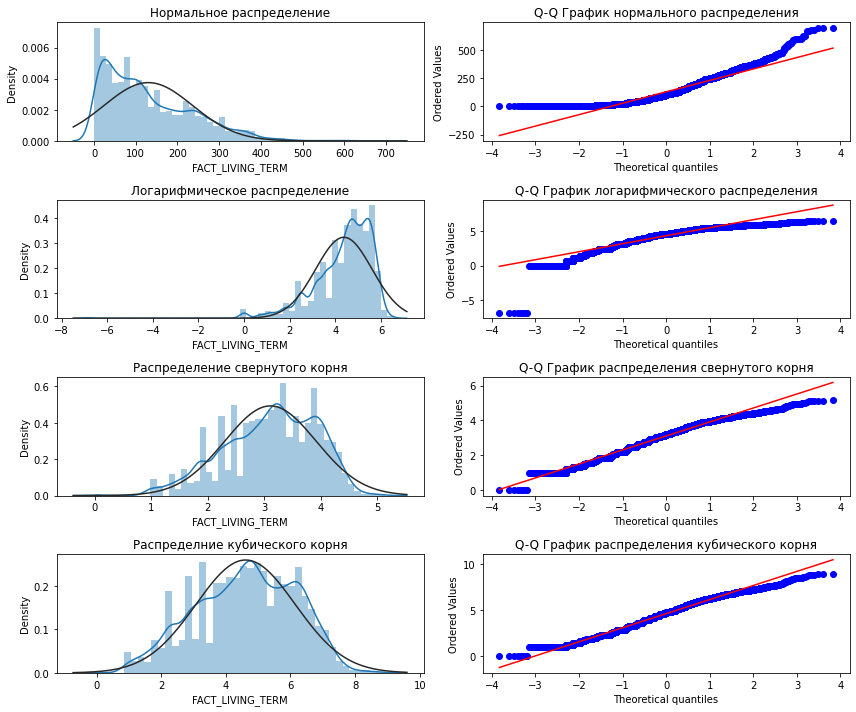

In [705]:
subplots(train['FACT_LIVING_TERM'] )
warnings.filterwarnings("ignore")

По-видимому, оптимальным преобразованием для переменной FACT_LIVING_TERM будет кубический корень. Ниже продолжу подбирать оптимум для остальных переменных.

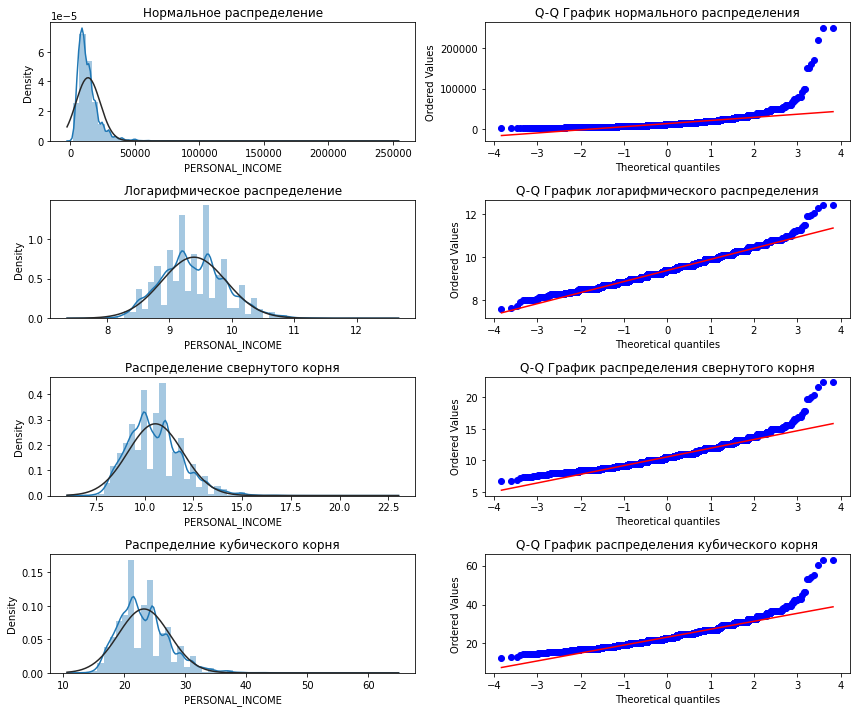

In [706]:
subplots(train['PERSONAL_INCOME'])
warnings.filterwarnings("ignore")

Оптимальным преобразованием для переменной PERSONAL_INCOME будет логарифм.

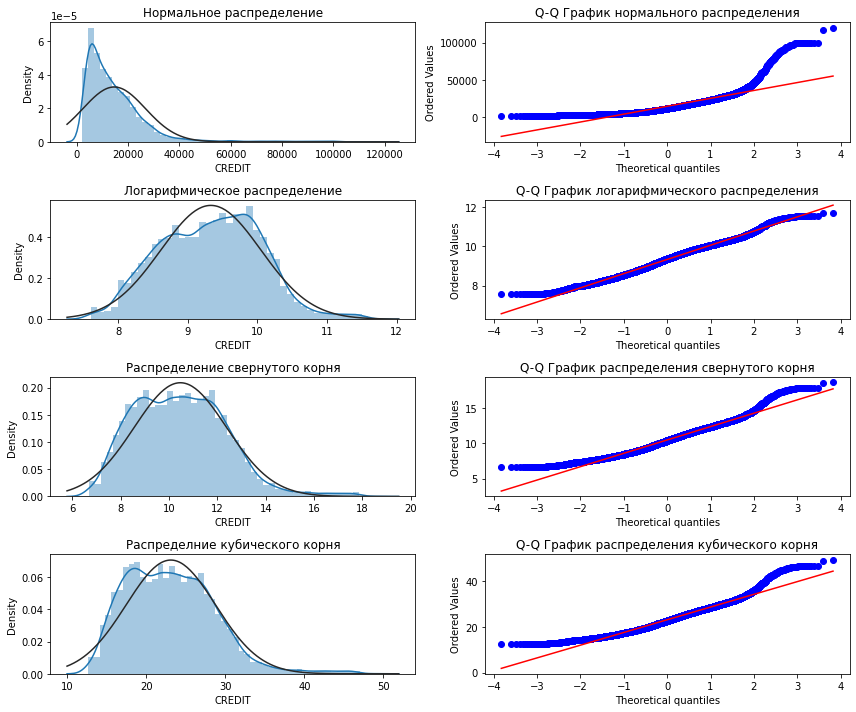

In [707]:
subplots(train['CREDIT'])
warnings.filterwarnings("ignore")

Оптимальным преобразованием для переменной CREDIT будет логарифм.

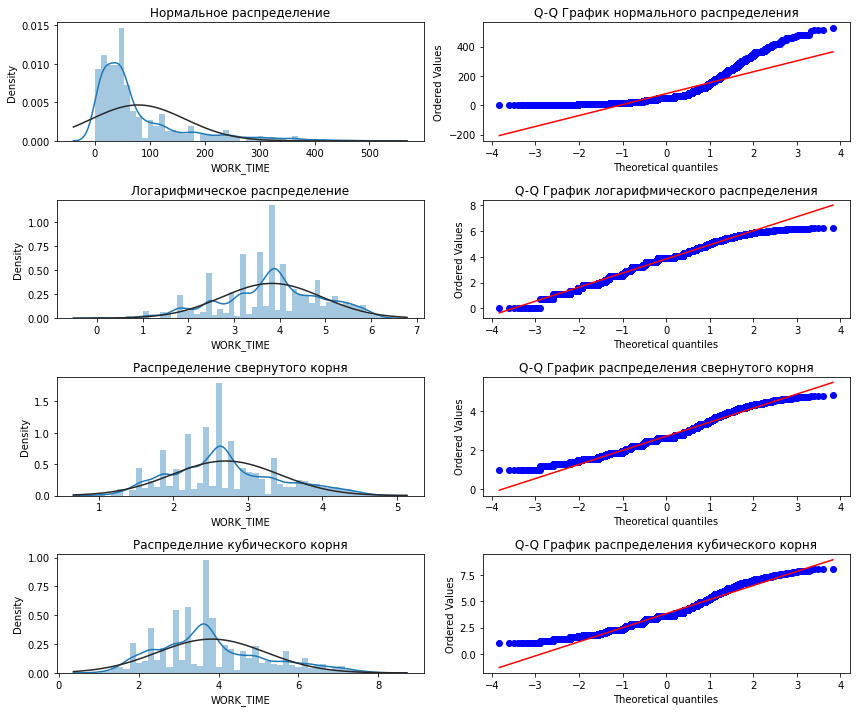

In [708]:
subplots(train['WORK_TIME'])
warnings.filterwarnings("ignore")


Оптимальным преобразованием для переменной WORK_TIME будет логарифм.

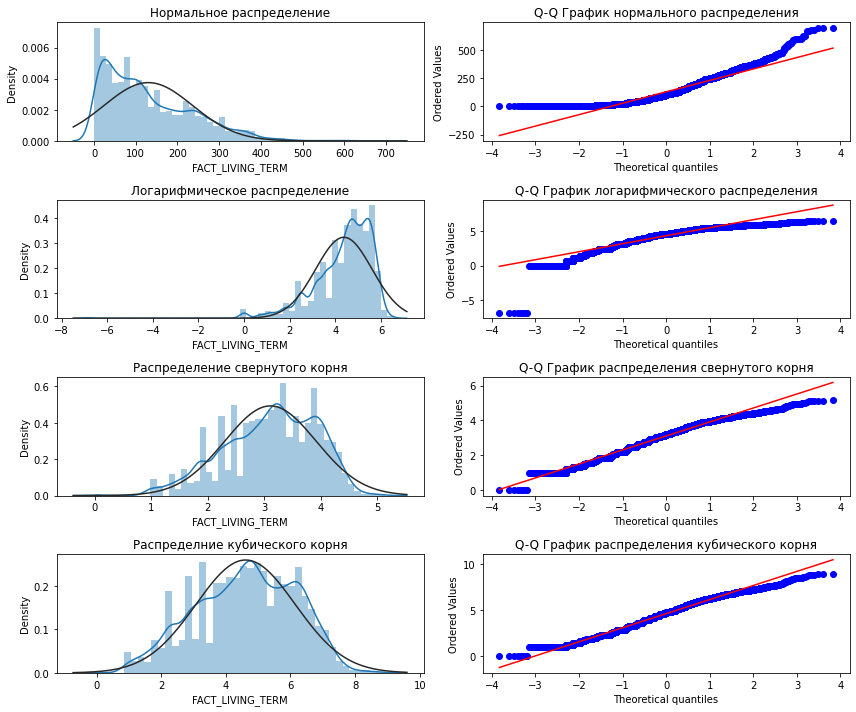

In [709]:
subplots(train['FACT_LIVING_TERM'])
warnings.filterwarnings("ignore")

А здесь оптимальным преобразованием для переменной FACT_LIVING_TERM будет кубический корень.

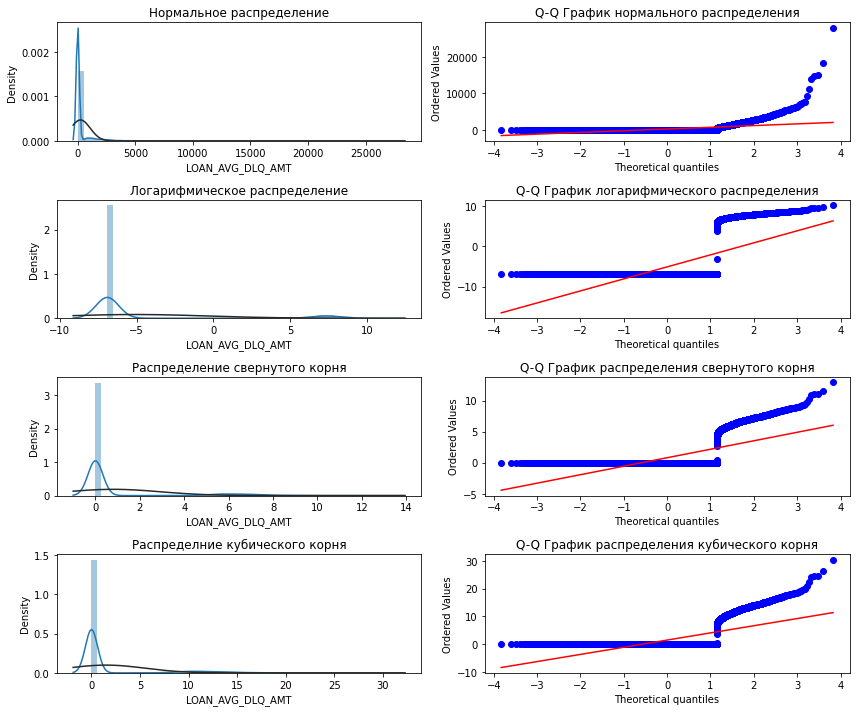

In [710]:
subplots(train['LOAN_AVG_DLQ_AMT'])
warnings.filterwarnings("ignore")

Здесь оптимальным преобразованием для переменной LOAN_AVG_DLQ_AMT будет логарифм, хотя он и "лучший из худших".

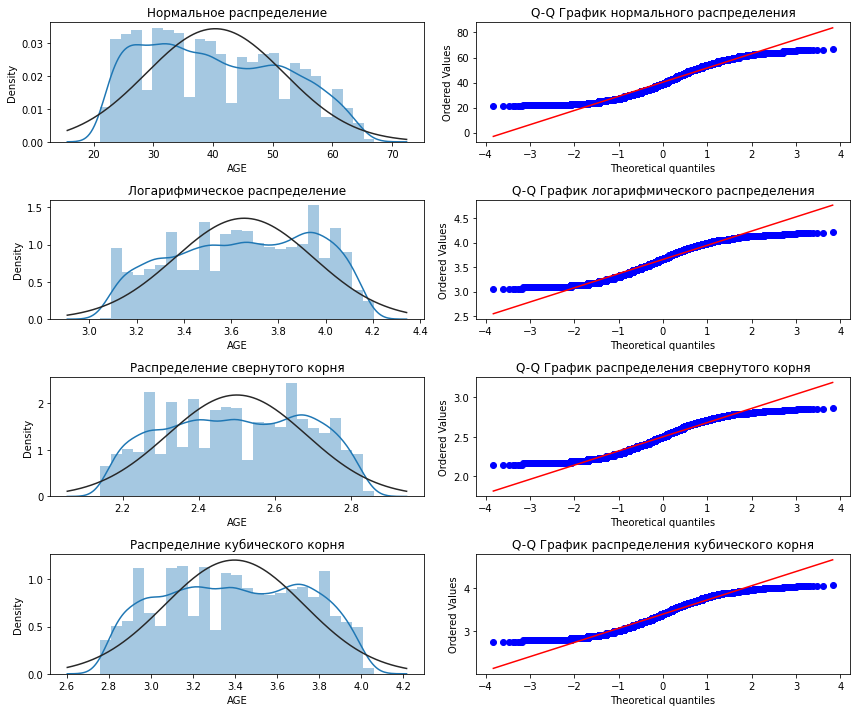

In [711]:
subplots(train['AGE'])
warnings.filterwarnings("ignore")

Оптимальным преобразованием для переменной AGE будет логарифм.

#### I.10. Выполнение преобразований, исходя из информации гистограмм распределения и графиков квантиль-квантиль

In [712]:
# выполняю логарифмическое преобразование
# переменной PERSONAL_INCOME
a = 0.0001
train['PERSONAL_INCOME'] = np.log(train['PERSONAL_INCOME'] + a)
test['PERSONAL_INCOME'] = np.log(test['PERSONAL_INCOME'] + a)

# выполняю логарифмическое преобразование
# переменной CREDIT
train['CREDIT'] = np.log(train['CREDIT'] + a)
test['CREDIT'] = np.log(test['CREDIT'] + a)

# выполняю логарифмическое преобразование
# переменной WORK_TIME
train['WORK_TIME'] = np.log(train['WORK_TIME'] + a)
test['WORK_TIME'] = np.log(test['WORK_TIME'] + a)

# выполняю преобразование переменной FACT_LIVING_TERM
# кубическим корнем
train['FACT_LIVING_TERM'] = np.sign(train['FACT_LIVING_TERM']) * (
    train['FACT_LIVING_TERM'].abs() ** (1/3))
test['FACT_LIVING_TERM'] = np.sign(test['FACT_LIVING_TERM']) * (
    test['FACT_LIVING_TERM'].abs() ** (1/3))

# выполняю логарифмическое преобразование
# переменной LOAN_AVG_DLQ_AMT
train['LOAN_AVG_DLQ_AMT'] = np.log(train['LOAN_AVG_DLQ_AMT'] + a)
test['LOAN_AVG_DLQ_AMT'] = np.log(test['LOAN_AVG_DLQ_AMT'] + a)

# выполняю логарифмическое преобразование
# переменной LOAN_AVG_DLQ_AMT
train['AGE'] = np.log(train['AGE'] + a)
test['AGE'] = np.log(test['AGE'] + a)

#### I.11. Конструирование новых признаков

Выполню конструирование следующих новых признаков:
+ Переменную CHILD_DEP - отношение количество детей (CHILD_TOTAL) к общему количеству детей и иждевенцев (CHILD_TOTAL и DEPENDANTS)
+ Переменную PAYMENT - сумму ежемесячного взноса по кредиту, разделив сумму кредита (CREDIT) на срок кредита (TERM)
+ Переменную PTI - коэффициент долгоыой нагрузки, разделив сумму ежемесячного взноса по кредиту (PAYMENT) на личный доход (PERSONAL_INCOME)
+ Переменную CLOSED_TO_TOTAL - коэффициент погашения ссуд, разделив количество погашенных ссуд (LOAN_NUM_CLOSED) на общее количество ссуд (LOAN_NYM_TOTAL)
+ переменную PAYM_TO_LOAN  - отношение количество платежей (LOAN_NYM_PAYM) к общему количеству ссуд (LOAN_NUM_TOTAL)
+ переменную DLQ_TO_PAYM - отношение количества просрочек (LOAN_DLQ_NUM) к общему количеству платежей (LOAN_NUM_PAYM)
+ переменную FST_SHARE - отношение суммы первого платежа по кредиту (FST_PAYMENT) к объединенной сумме первого платежа (FST_PAYMENT) и кредита (CREDIT) 

In [713]:
# создаю переменную CHILD_DEP - отношение количества детей (CHILD_TOTAL) 
# к общему количеству детей и иждивенцев (CHILD_TOTAL и DEPENDANTS)
train['CHILD_DEP'] = train['CHILD_TOTAL'] / (train['CHILD_TOTAL'] + train['DEPENDANTS'])
test['CHILD_DEP'] = test['CHILD_TOTAL'] / (test['CHILD_TOTAL'] + test['DEPENDANTS'])

# если переменная содержит пропуск, то возвращается значение 0, 
# если пропуска нет, то возвращается исходное значение переменной
train['CHILD_DEP'] = np.where(train['CHILD_DEP'].isnull(), 0, train['CHILD_DEP'])
test['CHILD_DEP'] = np.where(test['CHILD_DEP'].isnull(), 0, test['CHILD_DEP'])

# если бы переменная содержала бесконечные значения, то можно было бы воспользоваться
# train['CHILD_DEP'] = np.where(np.isfinite(train['CHILD_DEP']), train['CHILD_DEP'], 0)  
# т.е. если переменная CHILD_DEP содержит конечное значение, 
# возвращаем исходное значение, если она содержит бесконечное
# значение, возвращаем значение 0

# создаю переменную PAYMENT - сумму ежемесячного взноса
# по кредиту, разделив сумму кредита (CREDIT)
# на срок кредита (TERM)
train['PAYMENT'] = np.log((train['CREDIT'] / train['TERM']) + a)
test['PAYMENT'] = np.log((test['CREDIT'] / test['TERM']) + a)

# создаю переменную PTI - коэффициент долговой нагрузки, 
# разделив сумму ежемесячного взноса по кредиту (PAYMENT)
# на личный доход (PERSONAL_INCOME)
train['PTI'] = train['PAYMENT'] / train['PERSONAL_INCOME']
test['PTI'] = test['PAYMENT'] / test['PERSONAL_INCOME']

# создаю переменную CLOSED_TO_TOTAL - коэффициент погашения ссуд, 
# разделив количество погашенных ссуд (LOAN_NUM_CLOSED)
# на общее количество ссуд (LOAN_NUM_TOTAL)
train['CLOSED_TO_TOTAL'] = train['LOAN_NUM_CLOSED'] / train['LOAN_NUM_TOTAL']
test['CLOSED_TO_TOTAL'] = test['LOAN_NUM_CLOSED'] / test['LOAN_NUM_TOTAL']

# создаю переменную PAYM_TO_LOAN– отношение количества 
# платежей (LOAN_NUM_PAYM) к общему количеству ссуд (LOAN_NUM_TOTAL)
train['PAYM_TO_LOAN'] = train['LOAN_NUM_PAYM'] / train['LOAN_NUM_TOTAL']
test['PAYM_TO_LOAN'] = test['LOAN_NUM_PAYM'] / test['LOAN_NUM_TOTAL']

# создаю переменную DLQ_TO_PAYM – отношение количества просрочек 
# (LOAN_DLQ_NUM) к общему количеству платежей (LOAN_NUM_PAYM)
train['DLQ_TO_PAYM'] = train['LOAN_DLQ_NUM'] / train['LOAN_NUM_PAYM']
test['DLQ_TO_PAYM'] = test['LOAN_DLQ_NUM'] / test['LOAN_NUM_PAYM']

# создаю переменную FST_SHARE - отношение суммы первого платежа по кредиту
# к объединенной сумме первого платежа (FST_PAYMENT) и кредита (CREDIT) 
train['FST_SHARE'] = train['FST_PAYMENT'] / (train['FST_PAYMENT'] + train['CREDIT'])
test['FST_SHARE'] = test['FST_PAYMENT'] / (test['FST_PAYMENT'] + test['CREDIT'])

# создаю DLQ_TIME - индекс времени наступления максимальной просрочки, 
# разделив номер максимальной просрочки (LOAN_MAX_DLQ) 
# на количество просрочек (LOAN_DLQ_NUM)
train['DLQ_TIME'] = train['LOAN_MAX_DLQ'] / train['LOAN_DLQ_NUM']
test['DLQ_TIME'] = test['LOAN_MAX_DLQ'] / test['LOAN_DLQ_NUM']

# если переменная содержит пропуск, то возвращается значение 0, 
# если пропуска нет, то возвращается исходное значение переменной                     
train['DLQ_TIME'] = np.where(train['DLQ_TIME'].isnull(), 0, train['DLQ_TIME'])
test['DLQ_TIME'] = np.where(test['DLQ_TIME'].isnull(), 0, test['DLQ_TIME'])

# создаю переменную LOAN_MAX_DLQ_RANGE - разницу между максимальной суммой
# просрочки (LOAN_MAX_DLQ_AMT) и средней суммой просрочки (LOAN_AVG_DLQ_AMT)
train['LOAN_MAX_DLQ_RANGE'] = ((train['LOAN_MAX_DLQ_AMT'] - train['LOAN_AVG_DLQ_AMT']) / 
                               train['LOAN_AVG_DLQ_AMT']).abs()
test['LOAN_MAX_DLQ_RANGE'] = ((test['LOAN_MAX_DLQ_AMT'] - test['LOAN_AVG_DLQ_AMT']) / 
                              test['LOAN_AVG_DLQ_AMT']).abs()

# если переменная содержит пропуск, то возвращается значение 0, 
# если пропуска нет, то возвращается исходное значение переменной
train['LOAN_MAX_DLQ_RANGE'] = np.where(train['LOAN_MAX_DLQ_RANGE'].isnull(), 0, 
                                       train['LOAN_MAX_DLQ_RANGE'])
test['LOAN_MAX_DLQ_RANGE'] = np.where(test['LOAN_MAX_DLQ_RANGE'].isnull(), 0, 
                                      test['LOAN_MAX_DLQ_RANGE'])

#### I.12. Стандартизация

In [714]:
# выполню стандартизацию количественных переменных
num_cols = [c for c in train.columns if train[c].dtype.name != 'object']
train_copy = train.copy()
for i in num_cols:    
    train[i] = (train[i] - train[i].mean()) / train[i].std()
    test[i] = (test[i] - train_copy[i].mean()) / train_copy[i].std()

In [715]:
# Теперь проверю информацию об общем количестве пропущенных 
# наблюдений в обучающей и контрольной выборках
print(train.isnull().sum().sum())
print(test.isnull().sum().sum())

0
0


#### I.13. Дамми-кодирование

Теперь, когда в данных нет пропусков, проведу дамми-кодирование. Оно необходимо для корректной работы модели, в частности: обработки котегориальных данных, избежания  их искажения и улучшения производительности модели.

In [716]:
train_dummies = pd.get_dummies(train)
test_dummies = pd.get_dummies(test)
pd.set_option('display.max_columns', 500)

warnings.filterwarnings("ignore", message="matching Series behavior")
# смотрю, что получилось
test_dummies

,AGE,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,OWN_AUTO,CREDIT,TERM,FST_PAYMENT,FACT_LIVING_TERM,WORK_TIME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,CHILD_DEP,PAYMENT,PTI,CLOSED_TO_TOTAL,PAYM_TO_LOAN,DLQ_TO_PAYM,FST_SHARE,DLQ_TIME,LOAN_MAX_DLQ_RANGE,TARGET_0,TARGET_1,SOCSTATUS_WORK_FL_0,SOCSTATUS_WORK_FL_1,SOCSTATUS_PENS_FL_0,SOCSTATUS_PENS_FL_1,GENDER_0,GENDER_1,EDUCATION_Высшее,EDUCATION_Неоконченное высшее,EDUCATION_Неполное среднее,EDUCATION_Среднее,EDUCATION_Среднее специальное,MARITAL_STATUS_Вдовец/Вдова,MARITAL_STATUS_Гражданский брак,MARITAL_STATUS_Не состоял в браке,MARITAL_STATUS_Разведен(а),MARITAL_STATUS_Состою в браке,GEN_INDUSTRY_Банк/Финансы,GEN_INDUSTRY_Государственная служба,GEN_INDUSTRY_Другие сферы,GEN_INDUSTRY_Здравоохранение,GEN_INDUSTRY_Информационные технологии,GEN_INDUSTRY_Информационные услуги,GEN_INDUSTRY_Коммунальное хоз-во/Дорожные службы,GEN_INDUSTRY_Металлургия/Промышленность/Машиностроение,GEN_INDUSTRY_Наука,GEN_INDUSTRY_Не указано,GEN_INDUSTRY_Нефтегазовая промышленность,GEN_INDUSTRY_Образование,GEN_INDUSTRY_Развлечения/Искусство,GEN_INDUSTRY_Ресторанный бизнес/Общественное питание,GEN_INDUSTRY_СМИ/Реклама/PR-агенства,GEN_INDUSTRY_Салоны красоты и здоровья,GEN_INDUSTRY_Сборочные производства,GEN_INDUSTRY_Сельское хозяйство,GEN_INDUSTRY_Строительство,GEN_INDUSTRY_Торговля,GEN_INDUSTRY_Транспорт,GEN_INDUSTRY_Химия/Парфюмерия/Фармацевтика,GEN_INDUSTRY_ЧОП/Детективная д-ть,GEN_INDUSTRY_Энергетика,GEN_TITLE_0,GEN_TITLE_1,GEN_TITLE_2,GEN_TITLE_3,ORG_TP_STATE_Государственная комп./учреж.,ORG_TP_STATE_Индивидуальный предприниматель,ORG_TP_STATE_Не указано,ORG_TP_STATE_Некоммерческая организация,ORG_TP_STATE_Частная компания,ORG_TP_FCAPITAL_Без участия,ORG_TP_FCAPITAL_Не указано,ORG_TP_FCAPITAL_С участием,JOB_DIR_Адм-хоз. и трансп. службы,"JOB_DIR_Бухгалтерия, финансы, планир.",JOB_DIR_Вспомогательный техперсонал,JOB_DIR_Другое,JOB_DIR_Не указано,JOB_DIR_Пр-техн. обесп. и телеком.,JOB_DIR_Служба безопасности,JOB_DIR_Снабжение и сбыт,JOB_DIR_Участие в основ. деятельности,FAMILY_INCOME_до 5000 руб.,FAMILY_INCOME_от 10000 до 20000 руб.,FAMILY_INCOME_от 20000 до 50000 руб.,FAMILY_INCOME_от 5000 до 10000 руб.,FAMILY_INCOME_свыше 50000 руб.,REG_ADDRESS_PROVINCE_Адыгея,REG_ADDRESS_PROVINCE_Алтайский край,REG_ADDRESS_PROVINCE_Амурская область,REG_ADDRESS_PROVINCE_Архангельская область,REG_ADDRESS_PROVINCE_Астраханская область,REG_ADDRESS_PROVINCE_Башкирия,REG_ADDRESS_PROVINCE_Белгородская область,REG_ADDRESS_PROVINCE_Брянская область,REG_ADDRESS_PROVINCE_Бурятия,REG_ADDRESS_PROVINCE_Владимирская область,REG_ADDRESS_PROVINCE_Волгоградская область,REG_ADDRESS_PROVINCE_Вологодская область,REG_ADDRESS_PROVINCE_Воронежская область,REG_ADDRESS_PROVINCE_Горный Алтай,REG_ADDRESS_PROVINCE_ДРУГОЕ,REG_ADDRESS_PROVINCE_Еврейская АО,REG_ADDRESS_PROVINCE_Ивановская область,REG_ADDRESS_PROVINCE_Иркутская область,REG_ADDRESS_PROVINCE_Кабардино-Балкария,REG_ADDRESS_PROVINCE_Калининградская область,REG_ADDRESS_PROVINCE_Калужская область,REG_ADDRESS_PROVINCE_Камчатская область,REG_ADDRESS_PROVINCE_Карачаево-Черкесия,REG_ADDRESS_PROVINCE_Карелия,REG_ADDRESS_PROVINCE_Кемеровская область,REG_ADDRESS_PROVINCE_Кировская область,REG_ADDRESS_PROVINCE_Коми,REG_ADDRESS_PROVINCE_Костромская область,REG_ADDRESS_PROVINCE_Краснодарский край,REG_ADDRESS_PROVINCE_Красноярский край,REG_ADDRESS_PROVINCE_Курганская область,REG_ADDRESS_PROVINCE_Курская область,REG_ADDRESS_PROVINCE_Ленинградская область,REG_ADDRESS_PROVINCE_Липецкая область,REG_ADDRESS_PROVINCE_Марийская республика,REG_ADDRESS_PROVINCE_Мордовская республика,REG_ADDRESS_PROVINCE_Московская область,REG_ADDRESS_PROVINCE_Мурманская область,REG_ADDRESS_PROVINCE_Нижегородская область,REG_ADDRESS_PROVINCE_Новгородская область,REG_ADDRESS_PROVINCE_Новосибирская область,REG_ADDRESS_PROVINCE_Омская область,REG_ADDRESS_PROVINCE_Оренбургская область,REG_ADDRESS_PROVINCE_Орловская область,REG_ADDRESS_PROVINCE_П

#### I.14. Подготовка массивов признаков и массивов меток зависимой переменной

Теперь готовлю массивы признаков и массивы меток.

In [717]:
# создаю обучающий и контрольный массивы меток
y_train = train_dummies.loc[:, 'TARGET_1']
y_test = test_dummies.loc[:, 'TARGET_1']

# удаляю из будущих массивов признаков результаты
# дамми-кодирования зависимой переменной ТARGET_0 и TARGET_1
train_dummies.drop(['TARGET_0', 'TARGET_1'], axis=1, inplace=True)
test_dummies.drop(['TARGET_0', 'TARGET_1'], axis=1, inplace=True)

# создаю обучающий и контрольный массивы признаков
X_train = train_dummies.loc[:, 'AGE':'ORGCAT_2']
X_test = test_dummies.loc[:, 'AGE':'ORGCAT_2']

Наконец подготовив данные, можно начать моделирование 

#### I.15. Построение логистической регрессии с помощью класса LogisticRegression библиотеки scikit-learn

Для оценки качества модели буду использовать AUC (Area Under the ROC Curve). Чем ближе значение AUC к 1, тем лучше модель способна различать между классами. Значение AUC 0,5 говорит о случайном угадывании, а значение менее 0,5 указывает на то, что модель хуже случайного угадывания.<br>

Сначала попробую провести оценку с помощью  одного из наиболее широко используемых методов - LogisticRegression пакета sklearn.

In [718]:
# импортирую класс LogisticRegression
from sklearn.linear_model import LogisticRegression

In [719]:
# импортирую функцию roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
# строю логистическую регрессию
logreg = LogisticRegression().fit(X_train, y_train)
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_train, logreg.predict_proba(X_train)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])))
warnings.filterwarnings("ignore")

AUC на обучающей выборке: 0.747
AUC на контрольной выборке: 0.675


Теперь воспользуюсь L1-регуляризацией (лассо), которая устанавливает некоторые оценки коэффициентов регрессии точно в нуле и тем самым осуществляет отбор переменных.

In [720]:
logreg = LogisticRegression(C=0.2, penalty='l1', solver='liblinear').fit(X_train, y_train)
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_train, logreg.predict_proba(X_train)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])))
warnings.filterwarnings("ignore")

AUC на обучающей выборке: 0.730
AUC на контрольной выборке: 0.691


Из двух представленых вариантов проверки качества модели L1-регуляризация показала себя чуть лучше, поэтомк для дальнейшей работы выберу ее.<br> Гиперпараметр "C" подбирал вручную в диапазоне от 0 до 0.3. <br>
P.S. Я привел всего два способа расчета для "нераздутия" проекта. Существуют другие способы повышения качества модели, например: 
+ способ настройки гиперпараметра "C" с помощью класса GridSearchCV пакета sklearn - перебирает заданные варианты гиперпараметра "C" и дает оптимальный.
+ Построение логистической регрессии с помощью случайного леса (класса RFE) - позволяет отобрать лучшие признаки для модели с дальнейшим построением регрессии.
 + Использование пакета BorutaPy, где в основе лежит алгоритм оценки важности предикторов при помощи случайных переменных.
 + Другие способы на основе семплинга.

### ЭТАП II. ПОСТРОЕНИЕ МОДЕЛИ НА ВСЕЙ ИСТОРИЧЕСКОЙ ВЫБОРКЕ И ПРИМЕНЕНИЕ К НОВЫМ ДАННЫМ

#### II.1. Считывание CSV-файла, содержащего исторические данные

In [721]:
# загружаю набор данных
data = pd.read_csv('Credit_GLT.csv', encoding='cp1251', sep=';')

#### II.2. Предварительная обработка исторических данных

Для обработки новых данных, точно также, как были обработаны исторические данные напишу функцию, которая будет делать это в автоматическом режиме. Это позволит избежать расхождений в стратегиях предварительной подготовки на исторических (обучающих и новых данных).

In [722]:
# напишу функцию, выполняющую предварительную обработку
# исторических данных
def preprocessing(df):
    # удаляю идентификационную переменную AGREEMENT_RK,
    # потому что у нее количество уникальных значений
    # равно количеству наблюдений
    df.drop('AGREEMENT_RK', axis=1, inplace=True)
    
    # удаляю переменную DL_DOCUMENT_FL, потому что 
    # у нее одно уникальное значение
    df.drop('DL_DOCUMENT_FL', axis=1, inplace=True)
    
    # преобразую указанные переменные в тип object
    for i in ['TARGET', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'GENDER',
              'REG_FACT_FL', 'FACT_POST_FL', 'REG_POST_FL', 'REG_FACT_POST_FL', 
              'REG_FACT_POST_TP_FL', 'FL_PRESENCE_FL', 'AUTO_RUS_FL', 
              'HS_PRESENCE_FL', 'COT_PRESENCE_FL', 'GAR_PRESENCE_FL', 
              'LAND_PRESENCE_FL', 'GPF_DOCUMENT_FL', 'FACT_PHONE_FL', 
              'REG_PHONE_FL', 'GEN_PHONE_FL']:
        df[i] = df[i].astype('object') 
    
    # в указанных переменных заменяю запятую на точку в качестве
    # десятичного разделителя и преобразуем в тип float
    for i in ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 
              'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']:
        df[i] = df[i].str.replace(',', '.').astype('float')
    
    
    # если в интересующей нас переменной есть пропуск 
    # или при этом переменная SOCSTATUS_PENS_FL имеет значение 1,
    # заменяю такие пропуски меткой "Не указано"
    df['GEN_INDUSTRY'] = np.where(df['GEN_INDUSTRY'].isnull() \
                                  | (df['SOCSTATUS_PENS_FL'] == 1), 
                                  'Не указано', df['GEN_INDUSTRY'])
    df['GEN_TITLE'] = np.where(df['GEN_TITLE'].isnull() \
                               | (df['SOCSTATUS_PENS_FL'] == 1), 
                               'Не указано', df['GEN_TITLE'])
    df['ORG_TP_STATE'] = np.where(df['ORG_TP_STATE'].isnull() \
                                  | (df['SOCSTATUS_PENS_FL'] == 1),
                                  'Не указано', df['ORG_TP_STATE'])
    df['ORG_TP_FCAPITAL'] = np.where(df['ORG_TP_FCAPITAL'].isnull() \
                                     | (df['SOCSTATUS_PENS_FL'] == 1), 
                                     'Не указано', df['ORG_TP_FCAPITAL'])

    # заменяю пропуски в указанных переменных
    # меткой "Не указано"
    df['JOB_DIR'] = np.where(df['JOB_DIR'].isnull(), 'Не указано', df['JOB_DIR'])    
    df['REGION_NM'] = np.where(df['REGION_NM'].isnull(), 'Не указано', df['REGION_NM'])
    
    # пропуски в переменной TP_PROVINCE заменю значением
    # переменной FACT_ADDRESS_PROVINCE
    df['TP_PROVINCE'] = np.where(df['TP_PROVINCE'].isnull(), 
                                 df['FACT_ADDRESS_PROVINCE'], df['TP_PROVINCE'])
    
    # заменяю пропуски в переменной 
    # PREVIOUS_CARD_NUM_UTILIZED нулями
    df['PREVIOUS_CARD_NUM_UTILIZED'] = np.where(df['PREVIOUS_CARD_NUM_UTILIZED'].isnull(), 0, 
                                                df['PREVIOUS_CARD_NUM_UTILIZED'])
    
    # заменяю категорию "Не указано" на категорию "ЮЖНЫЙ"
    df['REGION_NM'] = np.where(df['REGION_NM'] == 'Не указано', 'ЮЖНЫЙ', df['REGION_NM'])
    
    # заменяю неверную категорию "ПОВОЛЖСКИЙ" на категорию "ПРИВОЛЖСКИЙ"
    df.loc[df['REGION_NM'] == 'ПОВОЛЖСКИЙ', 'REGION_NM'] = 'ПРИВОЛЖСКИЙ'
    
    # записываю редкие категории в одну отдельную категорию
    for i in ['REG_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE']:
        df[i] = np.where((df[i] == 'Москва') \
                         | (df[i] == 'Хакасия') \
                         | (df[i] == 'Ямало-Ненецкий АО') \
                         | (df[i] == 'Магаданская область') \
                         | (df[i] == 'Калмыкия') \
                         | (df[i] == 'Дагестан') \
                         | (df[i] == 'Агинский Бурятский АО') \
                         | (df[i] == 'Усть-Ордынский Бурятский АО') \
                         | (df[i] == 'Эвенкийский АО') \
                         | (df[i] == 'Коми-Пермяцкий АО') \
                         | (df[i] == 'Чечня'), 
                         'ДРУГОЕ', df['REG_ADDRESS_PROVINCE'])


    df['TP_PROVINCE'] = np.where((df['TP_PROVINCE'] == 'Сахалинская область') \
                                 | (df['TP_PROVINCE'] == 'Еврейская АО') \
                                 | (df['TP_PROVINCE'] == 'Магаданская область') \
                                 | (df['TP_PROVINCE'] == 'Дагестан') \
                                 | (df['TP_PROVINCE'] == 'Московская область') \
                                 | (df['TP_PROVINCE'] == 'Кабардино-Балкария') \
                                 | (df['TP_PROVINCE'] == '1'), 
                                 'ДРУГОЕ', df['TP_PROVINCE'])
    
    # укрупняю категории переменной EDUCATION
    for i in ['EDUCATION']:
        df[i] = np.where((df[i] == 'Ученая степень') \
                         | (df[i] == 'Два и более высших образования') \
                         | (df[i] == 'Два и более высших образования') \
                         | (df[i] == 'Высшее или несколько высших'),
                         'Высшее', df['EDUCATION'])
                         
    #df.at[df['EDUCATION'] == 'Ученая степень', 'EDUCATION'] = 'Высшее'
    #df.at[df['EDUCATION'] == 'Два и более высших образования', 
     #     'EDUCATION'] = 'Высшее'

    # записываю некоторые категории переменной GEN_INDUSTRY 
    # в отдельную категорию
    df.loc[df['GEN_INDUSTRY'] == 'Юридические услуги/нотариальные услуги', 
          'GEN_INDUSTRY'] = 'Другие сферы'
    df.loc[df['GEN_INDUSTRY'] == 'Страхование', 'GEN_INDUSTRY'] = 'Другие сферы'
    df.loc[df['GEN_INDUSTRY'] == 'Туризм', 'GEN_INDUSTRY'] = 'Другие сферы'
    df.loc[df['GEN_INDUSTRY'] == 'Недвижимость', 'GEN_INDUSTRY'] = 'Другие сферы'
    df.loc[df['GEN_INDUSTRY'] == 'Управляющая компания', 'GEN_INDUSTRY'] = 'Другие сферы'
    df.loc[df['GEN_INDUSTRY'] == 'Логистика', 'GEN_INDUSTRY'] = 'Другие сферы'
    df.loc[df['GEN_INDUSTRY'] == 'Подбор персонала', 'GEN_INDUSTRY'] = 'Другие сферы'
    df.loc[df['GEN_INDUSTRY'] == 'Маркетинг', 'GEN_INDUSTRY'] = 'Другие сферы'
    
    # укрупняю категории переменной GEN_TITLE
    df.loc[df['GEN_TITLE'] == 'Партнер', 'GEN_TITLE'] = 'Другое'
    df.loc[df['GEN_TITLE'] == 'Военнослужащий по контракту', 'GEN_TITLE'] = 'Другое'
    
    # укрупняю категории переменной ORG_TP_STATE
    df.loc[df['ORG_TP_STATE'] == 'Частная ком. с инос. капиталом', 
          'ORG_TP_STATE'] = 'Частная компания'
    
    # укрупняю категории переменной JOB_DIR
    df.loc[df['JOB_DIR'] == 'Реклама и маркетинг', 'JOB_DIR'] = 'Другое'
    df.loc[df['JOB_DIR'] == 'Кадровая служба и секретариат', 'JOB_DIR'] = 'Другое'
    df.loc[df['JOB_DIR'] == 'Пр-техн. обесп. и телеком.', 'JOB_DIR'] = 'Другое'
    df.loc[df['JOB_DIR'] == 'Юридическая служба', 'JOB_DIR'] = 'Другое'
    
    # создаю переменную FACT_TP_FL, которая принимает значение 1, если 
    # область фактического пребывания клиента и область торговой точки, 
    # где клиент брал последний кредит, совпадают, или 0
    # в противном случае
    df['FACT_TP_FL'] = np.where(df['FACT_ADDRESS_PROVINCE'] == df['TP_PROVINCE'], 
                                1, 0).astype('object')
    
    # создаюм переменную AUTO_FOR_FL, которая принимает значение 1,
    # если у клиента – импортный автомобиль, или 0 в противном случае
    df['AUTO_FOR_FL'] = np.where((df['AUTO_RUS_FL'] == '0') & (df['OWN_AUTO'] > 0), 
                                 1, 0).astype('object')
    
    # создаю переменные - результаты конъюнкций
    df['GENDER+GAR_PRESENCE_FL'] = df.apply(
        lambda x: f"{x['GENDER']} + {x['GAR_PRESENCE_FL']}",
        axis=1)
    df['REG_FACT_FL+GAR_PRESENCE_FL'] = df.apply(
        lambda x: f"{x['REG_FACT_FL']} + {x['GAR_PRESENCE_FL']}",
        axis=1)
           
    # значения переменной FACT_LIVING_TERM берю по модулю, чтобы 
    # избавиться от отрицательных значений
    df['FACT_LIVING_TERM'] = df['FACT_LIVING_TERM'].abs()
    
    # наблюдения, в которых количество лет проживания 
    # по месту фактического пребывания, превышает
    # возраст, записываю как пропуски 
    df['FACT_LIVING_TERM'] = np.where(df['FACT_LIVING_TERM'] / 12 > df['AGE'], 
                                      np.NaN, df['FACT_LIVING_TERM'])
    
    # импутирую пропуски медианой
    df['FACT_LIVING_TERM'].fillna(df['FACT_LIVING_TERM'].median(), inplace=True)
    
    # наблюдения, в которых время работы в годах превышает 
    # возраст (например, человек работает 40 лет, а живет 
    # всего 25), записываю как пропуски 
    df['WORK_TIME'] = np.where(df['WORK_TIME'] / 12 > df['AGE'], 
                               np.NaN, df['WORK_TIME'])
    
    # наблюдения, в которых разница между возрастом и временем работы в годах 
    # меньше 16 (например, у 30-летнего время работы в годах составляет 20 лет,
    # получается, он работает с 10 лет), записываю как пропуски 
    df['WORK_TIME'] = np.where((df['AGE'] - df['WORK_TIME'] / 12) < 16, 
                               np.NaN, df['WORK_TIME'])
    
    # импутирую пропуски в переменной WORK_TIME медианой
    df['WORK_TIME'].fillna(df['WORK_TIME'].median(), inplace=True)
    
    # на основе переменной PERSONAL_INCOME создаю переменную 
    # PERSONAL_INCOME_CAT, у которой метки категорий будут 
    # повторять метки категорий FAMILY_INCOME
    bins = [-np.inf, 5000, 10000, 20000, 50000, np.inf]
    lab = ['до 5000 руб.', 'от 5000 до 10000 руб.', 'от 10000 до 20000 руб.', 
           'от 20000 до 50000 руб.', 'свыше 50000 руб.']
    df['PERSONAL_INCOME_CAT'] = pd.cut(df['PERSONAL_INCOME'], bins, labels=lab) 
    
    # создаю переменную PERSONAL_FAMILY_INCOME, которая принимает значение 1, если 
    # категория переменной PERSONAL_INCOME_CAT совпадает с категорией 
    # переменной FAMILY_INCOME, или 0 в противном случае, затем
    # преобразовываю в тип object
    df['PERSONAL_FAMILY_INCOME'] = np.where(df['PERSONAL_INCOME_CAT'] == df['FAMILY_INCOME'], 
                                            1, 0).astype('object')
    
    # удаляю переменную PERSONAL_INCOME_CAT
    df.drop('PERSONAL_INCOME_CAT', axis=1, inplace=True)
      
    # задаю точки, в которых будут находится границы категорий 
    # будущей переменной CREDITCAT
    bins = [-np.inf, 5269.667, 7940.0, 11628.5, 16322.667, 22640.833, np.inf]
    
    # осуществляю биннинг переменной CREDIT и записываем
    # результаты в новую переменную CREDITCAT
    df['CREDITCAT'] = pd.cut(df['CREDIT'], bins).astype('object')
    
    # задаю точки, в которых будут находится границы категорий 
    # будущей переменной FSTPAYMENTCAT
    bins = [-np.inf, 1200.0, 2000.0, 5000.0, np.inf]
    
    # осуществляю биннинг переменной FST_PAYMENT и записываем
    # результаты в новую переменную FSTPAYMENTCAT
    df['FSTPAYMENTCAT'] = pd.cut(df['FST_PAYMENT'], bins).astype('object')
    
    # задаю точки, в которых будут находится границы категорий 
    # будущей переменной AGECAT
    bins = [-np.inf, 21, 33.0, 46.0, 67.0, np.inf]
    
    # осуществляю биннинг переменной AGE и записываю
    # результаты в новую переменную AGECAT
    df['AGECAT'] = pd.cut(df['AGE'], bins).astype('object')
        
    # пишу функцию, которая создает 
    # из списка списков словарь
    def list_to_dict(input_list):    
        output_dict = {}    
        for n, sample_list in enumerate(input_list):
            for value in sample_list:
                output_dict[value] = n                
        return output_dict
    
    # создаю список списков для
    # переменной GEN_TITLE
    map_df_list = [
        ['Рабочий',
         'Служащий',
         'Работник сферы услуг',
         'Другое',
         'Индивидуальный предприниматель',
         'Руководитель низшего звена'],
        ['Специалист',
         'Руководитель среднего звена'],
        ['Не указано'],
        ['Высококвалифиц. специалист', 
         'Руководитель высшего звена']
    ]
    
    # создаю из списка списков словарь
    map_df_dict = list_to_dict(map_df_list)
    
    # укрупняю категории переменной GEN_TITLE
    df['GEN_TITLE'] = df['GEN_TITLE'].map(map_df_dict).astype('object')    
    
    # создаю список списков для
    # переменной REGION_NM
    map_df_list2 = [
        ['ЮЖНЫЙ', 'ЦЕНТРАЛЬНЫЙ 1', 'ЦЕНТРАЛЬНЫЙ 2'],
        ['ЗАПАДНО-СИБИРСКИЙ', 'ВОСТОЧНО-СИБИРСКИЙ', 'УРАЛЬСКИЙ',
         'ДАЛЬНЕВОСТОЧНЫЙ', 'СЕВЕРО-ЗАПАДНЫЙ', 'ЦЕНТРАЛЬНЫЙ ОФИС'],
        ['ПРИВОЛЖСКИЙ']
    ]
    
    # создаю из списка списков словарь
    map_df_dict2 = list_to_dict(map_df_list2)
    
    # на основе укрупнения категорий переменной REGION_NM 
    # создадаю переменную REGIONCAT
    df['REGIONCAT'] = df['REGION_NM'].map(map_df_dict2).astype('object')
    
    # создаю список списков для
    # переменной ORG_TP_STATE
    map_df_list3 = [
        ['Частная компания', 
         'Индивидуальный предприниматель', 
         'Некоммерческая организация'],
        ['Не указано'],
        ['Государственная комп./учреж.']
    ]
    
    # создаю из списка списков словарь
    map_df_dict3 = list_to_dict(map_df_list3)
    
    # на основе укрупнения категорий переменной ORG_TP_STATE 
    # создаю переменную ORGCAT
    df['ORGCAT'] = df['ORG_TP_STATE'].map(map_df_dict3).astype('object')
   
    # задаю константу
    a = 0.0001
    # выполняю логарифмическое преобразование
    # переменной PERSONAL_INCOME
    df['PERSONAL_INCOME'] = np.log(df['PERSONAL_INCOME'] + a)
    
    # выполняю логарифмическое преобразование
    # переменной CREDIT
    df['CREDIT'] = np.log(df['CREDIT'] + a)
    
    # выполняю логарифмическое преобразование
    # переменной WORK_TIME
    df['WORK_TIME'] = np.log(df['WORK_TIME'] + a)
    
    # выполняю преобразование переменной FACT_LIVING_TERM
    # кубическим корнем
    df['FACT_LIVING_TERM'] = np.sign(df['FACT_LIVING_TERM']) * (
        df['FACT_LIVING_TERM'].abs() ** (1/3))
    
    # выполняю логарифмическое преобразование 
    # переменной LOAN_AVG_DLQ_AMT
    df['LOAN_AVG_DLQ_AMT'] = np.log(df['LOAN_AVG_DLQ_AMT'] + a)
    
    # создаю переменную CHILD_DEP
    df['CHILD_DEP'] = df['CHILD_TOTAL'] / (df['CHILD_TOTAL'] + df['DEPENDANTS'])
    
    # если переменная содержит пропуск, то возвращается значение 0, 
    # если пропуска нет, то возвращается исходное значение переменной
    df['CHILD_DEP'] = np.where(df['CHILD_DEP'].isnull(), 0, df['CHILD_DEP'])
    
    # создаю переменную PAYMENT - сумму ежемесячного взноса
    # по кредиту, разделив сумму кредита (CREDIT)
    # на срок кредита (TERM)
    df['PAYMENT'] = np.log((df['CREDIT'] / df['TERM']) + a)
    
    # создаю переменную PTI - коэффициент долговой нагрузки, 
    # разделив сумму ежемесячного взноса по кредиту (PAYMENT)
    # на личный доход (PERSONAL_INCOME)
    df['PTI'] = df['PAYMENT'] / df['PERSONAL_INCOME']
    
    # создаю переменную CLOSED_TO_TOTAL - коэффициент погашения ссуд, 
    # разделив количество погашенных ссуд (LOAN_NUM_CLOSED)
    # на общее количество ссуд (LOAN_NUM_TOTAL)
    df['CLOSED_TO_TOTAL'] = df['LOAN_NUM_CLOSED'] / df['LOAN_NUM_TOTAL']
    
    # создаю переменную PAYM_TO_LOAN – отношение количества платежей 
    # (LOAN_NUM_PAYM) к общему количеству ссуд (LOAN_NUM_TOTAL)
    df['PAYM_TO_LOAN'] = df['LOAN_NUM_PAYM'] / df['LOAN_NUM_TOTAL']
    
    # создаю переменную DLQ_TO_PAYM – отношение количества просрочек 
    # (LOAN_DLQ_NUM) к общему количеству платежей (LOAN_NUM_PAYM)
    df['DLQ_TO_PAYM'] = df['LOAN_DLQ_NUM'] / df['LOAN_NUM_PAYM']
    
    # создаю переменную FST_SHARE - отношение суммы первого платежа по кредиту
    # к объединенной сумме первого платежа (FST_PAYMENT) и кредита (CREDIT) 
    df['FST_SHARE'] = df['FST_PAYMENT'] / (df['FST_PAYMENT'] + df['CREDIT'])
    
    # создаю DLQ_TIME - индекс времени наступления максимальной просрочки, 
    # разделив номер максимальной просрочки (LOAN_MAX_DLQ) 
    # на количество просрочек (LOAN_DLQ_NUM)
    df['DLQ_TIME'] = df['LOAN_MAX_DLQ'] / df['LOAN_DLQ_NUM']
    df['DLQ_TIME'] = np.where(df['DLQ_TIME'].isnull(), 0, df['DLQ_TIME'])
    
    # создаю переменную LOAN_MAX_DLQ_RANGE - разницу между максимальной суммой
    # просрочки (LOAN_MAX_DLQ_AMT) и средней суммой просрочки (LOAN_AVG_DLQ_AMT)   
    df['LOAN_MAX_DLQ_RANGE'] = ((df['LOAN_MAX_DLQ_AMT'] - df['LOAN_AVG_DLQ_AMT']) / 
                                df['LOAN_AVG_DLQ_AMT']).abs()
    df['LOAN_MAX_DLQ_RANGE'] = np.where(df['LOAN_MAX_DLQ_RANGE'].isnull(), 0, 
                                        df['LOAN_MAX_DLQ_RANGE'])
    
    # выполняю стандартизацию количественных переменных
    num_cols = [c for c in df.columns if df[c].dtype.name != 'object']    
    for i in num_cols:    
        df[i] = (df[i] - df[i].mean()) / df[i].std() 

In [723]:
# загружаю набор данных
data = pd.read_csv('Credit_GLT.csv', encoding='cp1251', sep=';')

Применю функцию предварительной обработки к историческим данным и выполню дамми-кодирование для формирования массива признаков и меток.

In [724]:
# выполняю предварительную обработку
# исторических данных
preprocessing(data)

In [725]:
# выполняю дамми-кодирование
data_dummies = pd.get_dummies(data) 
# создаю обучающий массив меток
y = data_dummies.loc[:, 'TARGET_1']    
# удаляю из будущего массива признаков результаты
# дамми-кодирования зависимой переменной -
# TARGET_0 и TARGET_1
data_dummies.drop(['TARGET_0', 'TARGET_1'], axis=1, inplace=True)    
# создаю обучающий массив признаков
X = data_dummies.loc[:, 'AGE':'ORGCAT_2']

#### II.3. Обучение модели логистической регрессии на всех исторических данных

Теперь обучу на всей исторической выборке модель логистической регрессии с оптимальным значением гиперпараметра "С".

In [726]:
# строим логистическую регрессию
logreg = LogisticRegression(C=0.2, penalty='l1', solver='liblinear').fit(X, y)
print("AUC на всей исторической выборке: {:.3f}".
      format(roc_auc_score(y, logreg.predict_proba(X)[:, 1])))

AUC на всей исторической выборке: 0.725


#### II.4. Считывание CSV-файла, содержащего новые данные

А сейчас подгружаю новые данны 'Credit_GLT_new.csv'

In [727]:
# загружаю новые данные
new_data = pd.read_csv('Credit_GLT_new.csv', encoding='cp1251', sep=';')

#### II.5. Предварительная обработка новых данных

In [728]:
# выполняю предварительную обработку
# новых данных
preprocessing(new_data)

In [729]:
# выполняю дамми-кодирование
# новых данных
new_data_dummies = pd.get_dummies(new_data)
# создаю массив меток
y_new = new_data_dummies.loc[:, 'TARGET_1']    
# удаляю из будущего массива признаков результаты
# дамми-кодирования зависимой переменной -
# TARGET_0 и TARGET_1
new_data_dummies.drop(['TARGET_0', 'TARGET_1'], axis=1, inplace=True)    
# создаю массив признаков
X_new = new_data_dummies.loc[:, 'AGE':'ORGCAT_2']


#### II.6. Применение модели логистической регрессии, построенной на всех исторических данных, к новым данным

In [730]:
# строим логистическую регрессию
print("AUC на всей исторической выборке: {:.3f}".
      format(roc_auc_score(y_new, logreg.predict_proba(X_new)[:, 1])))

AUC на всей исторической выборке: 0.709


#### III.1 Выводы

+ Качество регрессионной модели составило 0.709 по меркам AUC, что показывает неплохое качество модели.
+ Качество модели можно пробовать повышать другими методами, такими как "случайный лес", использование "теневых" предикторов с помощью BorutaPy, изменять вес классов при несбалансированных наборах данных и так далее.
+ После повышения качества модели можно перейти к развертыванию модели на практике, например интегрировать модель в процессы принятия решений в организации.
+ Также можно Ииучить коэффициенты модели, чтобы понять влияние каждого признака на прогноз.
+ Важно следить за работой модели в реальном времени и периодически обновлять ее, чтобы сохранить высокое качество прогнозов.